In [388]:
import pandas as pd 
import numpy as np 
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# import data
df_base = pd.read_csv('data/Base.csv') 

# import feature data types
with open('data_types.json') as f:
    data_types = json.load(f) 

# encoding source {'INTERNET', 'TELEAPP'} into source_is_internet_not_teleapp
df_base['source_is_internet_not_teleapp'] = (df_base['source'] == 'INTERNET').astype(int)
df_base.drop('source', axis=1, inplace=True)

# recording which variables have missing values recorded as -1
missing_values = ['prev_address_months_count',
                  'current_address_months_count',
                  'bank_months_count',
                  'session_length_in_minutes',
                  'device_distinct_emails_8w']

In [407]:
# import feature data types
with open('data_types.json') as f:
    data_types = json.load(f) 

In [427]:
import EDA
import importlib
importlib.reload(EDA)
FeatureSignificance = EDA.FeatureSignificance
FeatureVisualisation = EDA.FeatureVisualisation
OddsRatios = EDA.OddsRatios

fs = FeatureSignificance(df_base, target='fraud_bool')
fv = FeatureVisualisation(df_base, target='fraud_bool')
odds = OddsRatios(df_base, target='fraud_bool', missing_values=missing_values)

In [391]:
fs.calculations()

temporal                        [Spearman Correlation, Chi-Square Test (Goodness of Fit)]
ordinal                           [Spearman Correlation, Logistic Regression Coefficient]
numerical_discrete                                   [Point-Biserial Correlation, T-Test]
numerical_continuous                             [Spearman Correlation, T-Test, K-S Test]
nominal_multi_category        [Chi-Square Test of Independence (Contingency), Cramér’s V]
nominal_binary            [Chi-Square Test of Independence (Contingency), Point-Biserial]
dtype: object


In [392]:
fs.numerical_discrete(data_types['numerical_discrete'])

/opt/miniconda3/envs/pytf/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Point-Biserial Correlation        p-value  \
Feature                                                                       
credit_risk_score                                   0.070588   0.000000e+00   
device_distinct_emails_8w                           0.036542  1.921787e-292   
current_address_months_count                        0.033480  7.586132e-245   
bank_months_count                                   0.020929   4.312880e-73   
prev_address_months_count                           0.020083   5.238191e-27   
zip_count_4w                                        0.005212   1.868284e-07   
bank_branch_count_8w                               -0.011577   5.397590e-31   
date_of_birth_distinct_emails_4w                   -0.043224   0.000000e+00   
device_fraud_count                                       NaN            NaN   

                                     t_stat  t_stat p_value  
Feature                                                      
credit_risk_score                -60.091371    0.000000e+00  
device_distinct_emails_8w        -20.377266    1.199204e-90  
current_address_months_count     -34.620596   1.082672e-249  
bank_months_count                -17.692433    1.458684e-68  
prev_address_months_count         -8.357725    2.417317e-16  
zip_count_4w                      -5.210355    1.918071e-07  
bank_branch_count_8w              12.764196    4.674261e-37  
date_of_birth_distinct_emails_4w  44.852802    0.000000e+00  
device_fraud_count                      NaN             NaN

In [393]:
fs.numerical_continuous(data_types['numerical_continuous_bounded'] + data_types['numerical_continuous_unbounded'])

Spearman Correlation  Spearman p-value  \
Feature                                                             
session_length_in_minutes              0.002058      3.981677e-02   
velocity_24h                          -0.010509      7.791899e-26   
velocity_4w                           -0.013524      1.118804e-41   
days_since_request                    -0.014209      7.956264e-46   
velocity_6h                           -0.016497      3.816254e-61   
intended_balcon_amount                -0.017954      4.326131e-72   
name_email_similarity                 -0.037283     1.936639e-304   

                           T-Statistic  T-Test p-value  K-S Statistic  \
Feature                                                                 
session_length_in_minutes    -7.450250    1.000315e-13       0.027061   
velocity_24h                 11.511446    1.709035e-30       0.047764   
velocity_4w                  10.882405    1.915534e-27       0.071602   
days_since_request           -0.535197    5.925240e-01       0.069237   
velocity_6h                  17.508297    9.682576e-68       0.063211   
intended_balcon_amount       29.776915   1.070649e-187       0.143678   
name_email_similarity        35.923329   1.167023e-267       0.185558   

                             K-S p-value  
Feature                                   
session_length_in_minutes   2.318452e-07  
velocity_24h                4.602355e-22  
velocity_4w                 4.519496e-49  
days_since_request          6.583571e-46  
velocity_6h                 2.493909e-38  
intended_balcon_amount     6.122341e-197  
name_email_similarity       0.000000e+00

In [394]:
fs.nominal_multi_category(data_types['nominal_multi_category'])

Chi Square Statistic  p-value (Chi-Square)  cramers v
Feature                                                                     
housing_status                 13202.787719                   0.0   0.114903
proposed_credit_limit          11738.244603                   0.0   0.108343
device_os                       6478.945928                   0.0   0.080492
employment_status               1572.499001                   0.0   0.039655
payment_type                    1528.342010                   0.0   0.039094

In [395]:
fs.nominal_binary(data_types['nominal_binary'])

Chi Square Statistic  p-value (Chi-Square)  \
Feature                                                                      
email_is_free                             769.952405         1.841219e-169   
foreign_request                           284.060841          9.787932e-64   
source_is_internet_not_teleapp             14.937804          1.111140e-04   
phone_mobile_valid                        173.301368          1.406547e-39   
phone_home_valid                         1233.281326         3.567963e-270   
has_other_cards                          1235.161652         1.392459e-270   
keep_alive_session                       2528.754445          0.000000e+00   

                                Point-Biserial Correlation  \
Feature                                                      
email_is_free                                     0.027758   
foreign_request                                   0.016885   
source_is_internet_not_teleapp                   -0.003922   
phone_mobile_valid                               -0.013180   
phone_home_valid                                 -0.035128   
has_other_cards                                  -0.035156   
keep_alive_session                               -0.050296   

                                p-value (Point-Biserial)  
Feature                                                   
email_is_free                              1.216719e-169  
foreign_request                             5.722730e-64  
source_is_internet_not_teleapp              8.774983e-05  
phone_mobile_valid                          1.140352e-39  
phone_home_valid                           1.734899e-270  
has_other_cards                            6.347503e-271  
keep_alive_session                          0.000000e+00

In [396]:
fs.ordinal(data_types['ordinal'])

Spearman Correlation  Spearman p-value  Log Regression coef
Feature                                                                  
income                    0.049583               0.0             1.711414
customer_age              0.058146               0.0             0.045050

In [397]:
fs.temporal(data_types['temporal'])

Spearman Correlation  p-value (Spearman)  Chi-Square Statistic  \
Feature                                                                   
month                0.012949        2.362542e-38            330.160493   

         p-value (Chi-Square)  
Feature                        
month            2.166747e-67

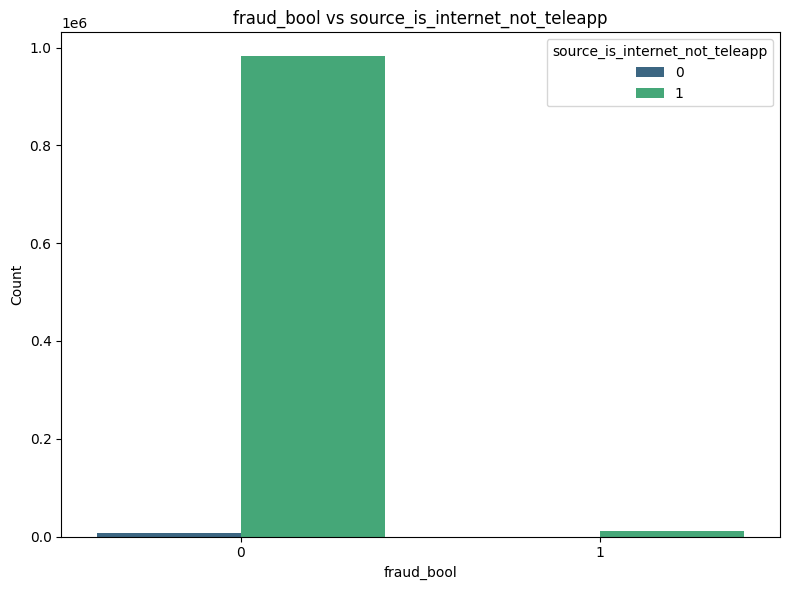

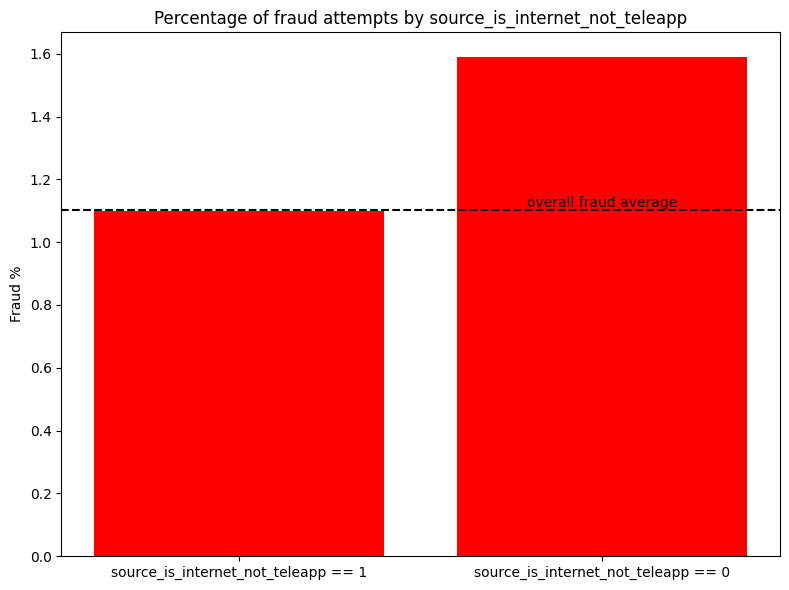

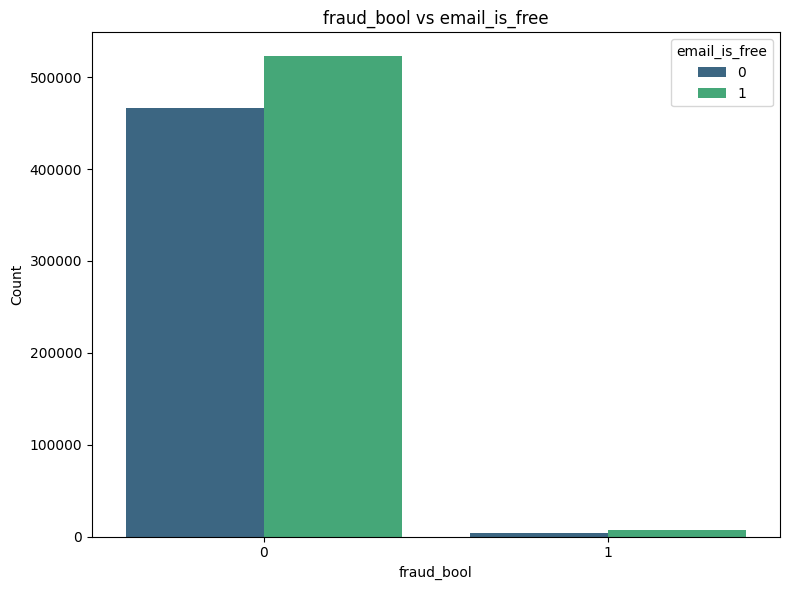

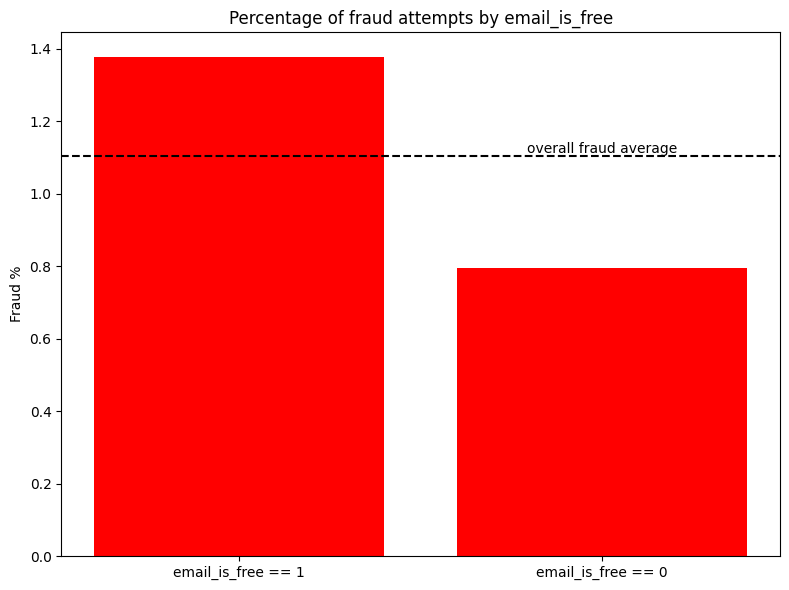

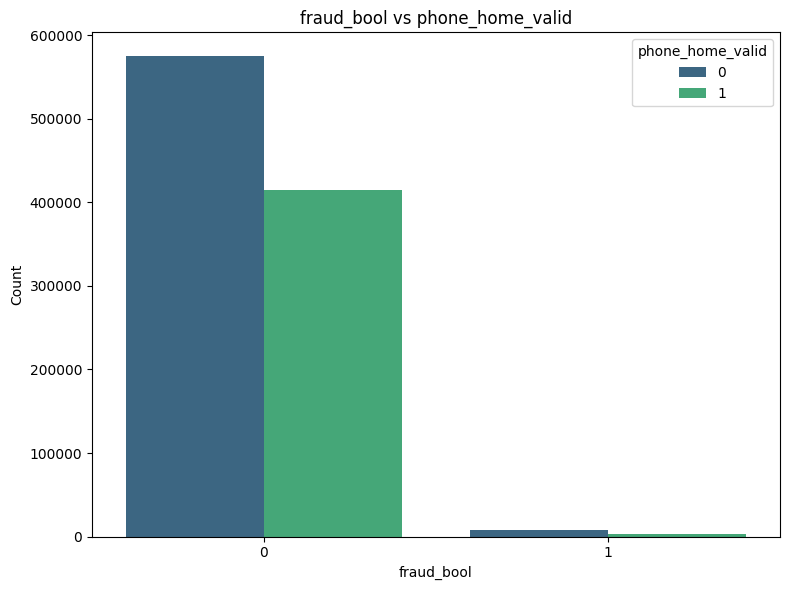

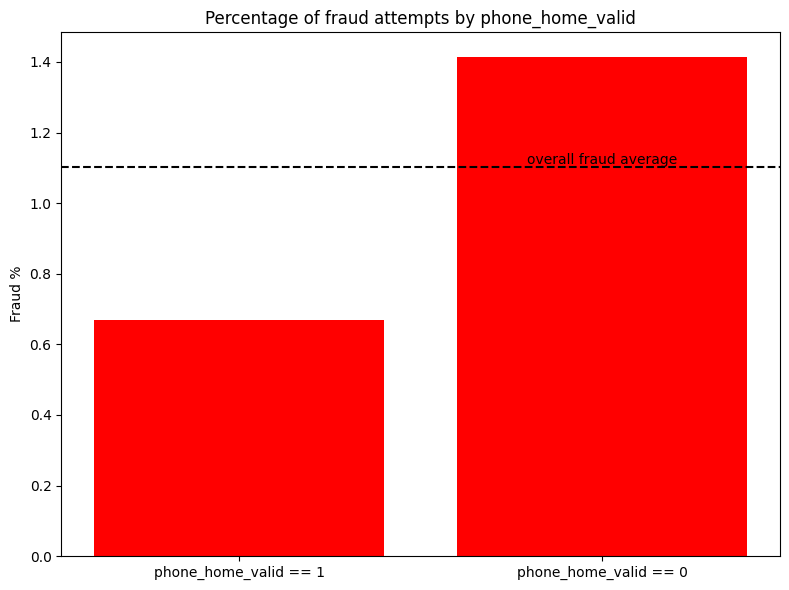

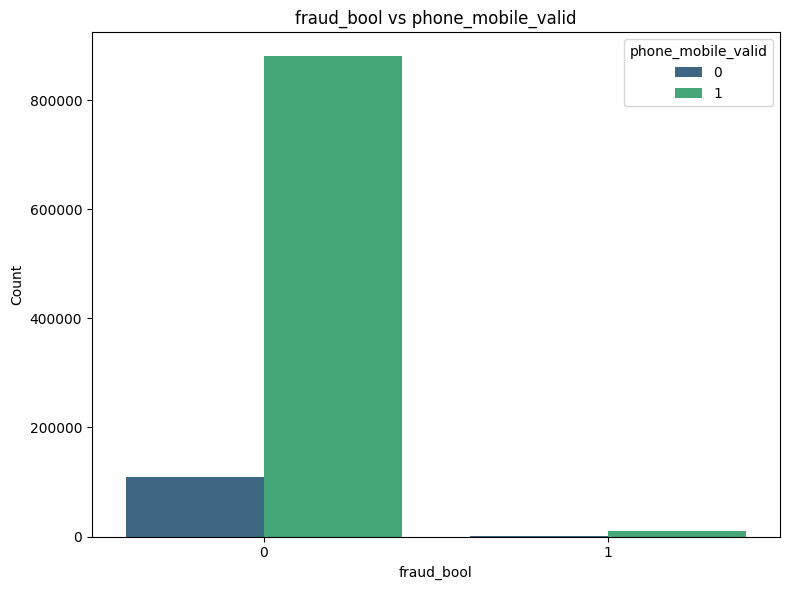

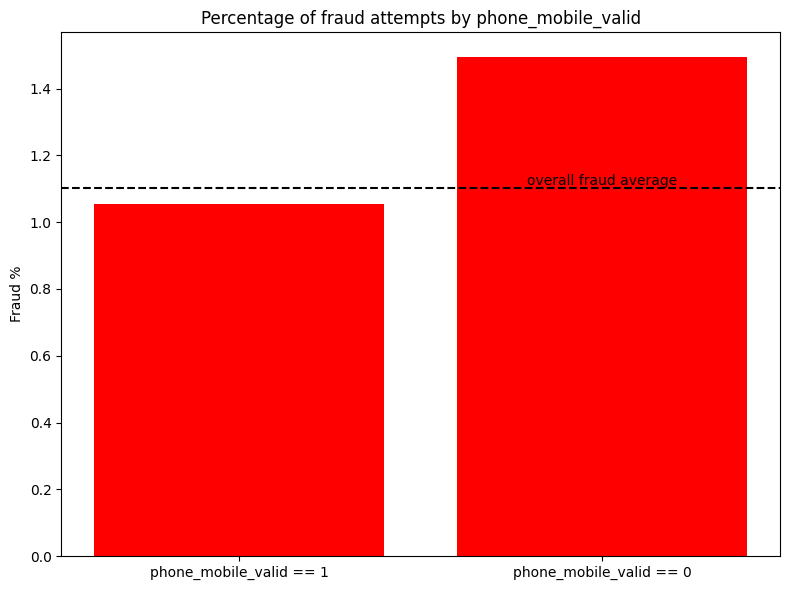

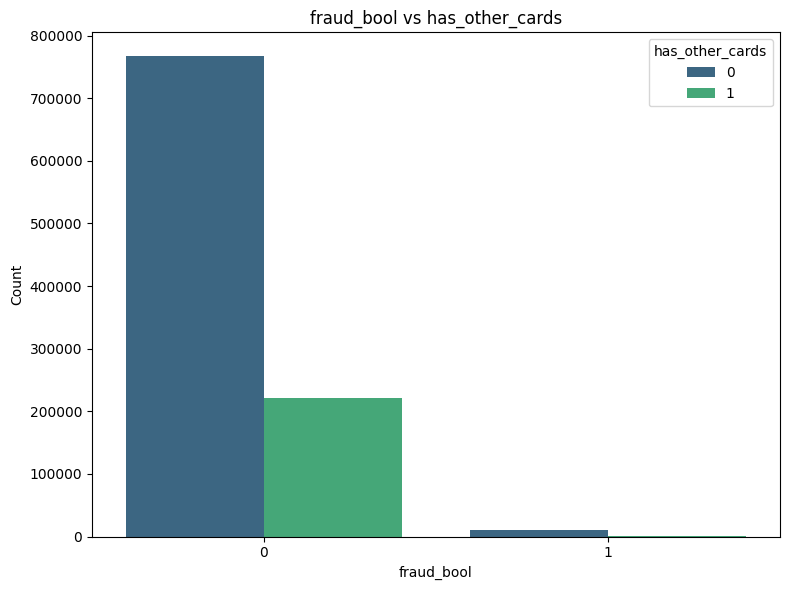

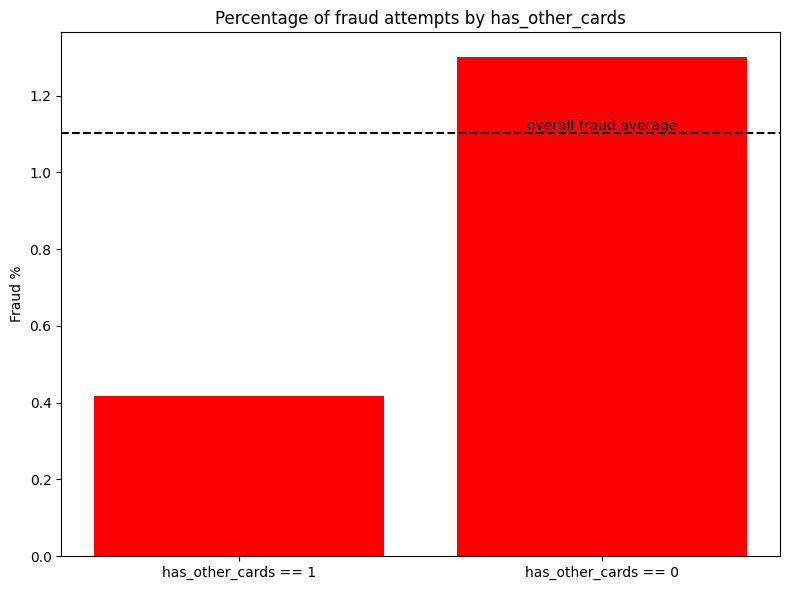

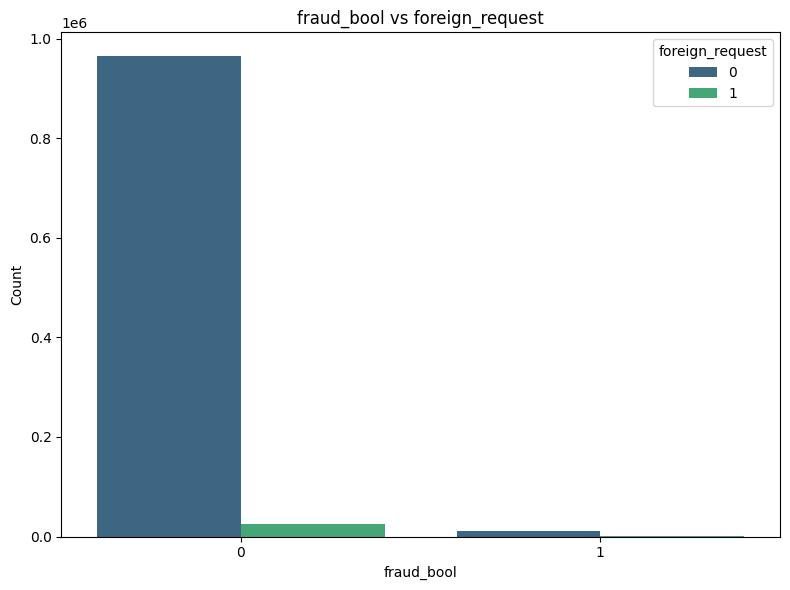

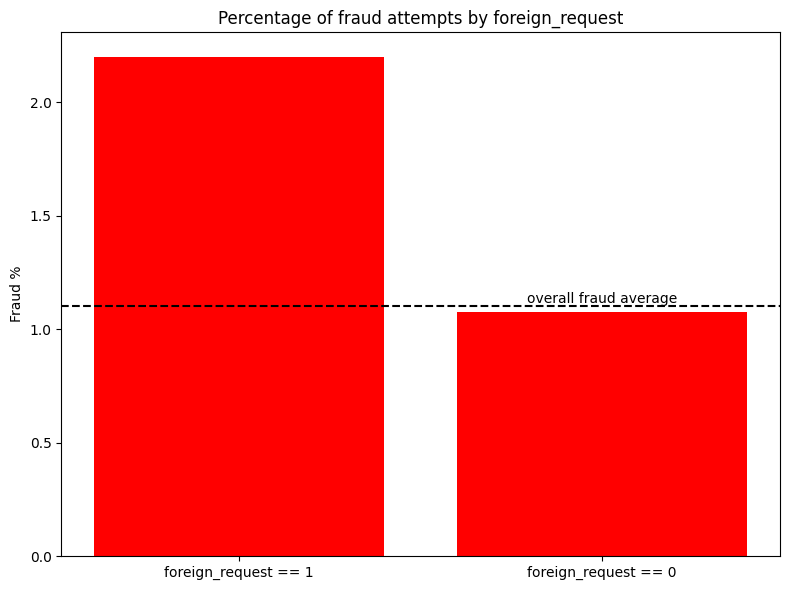

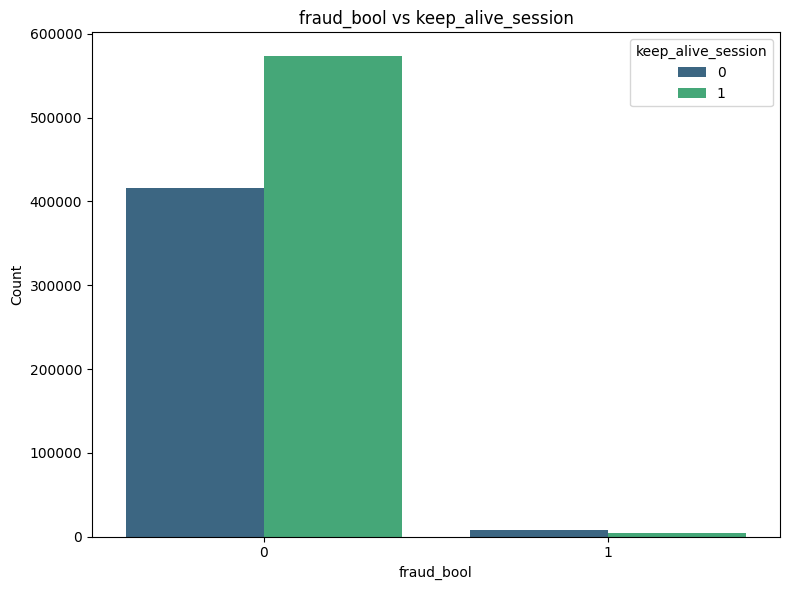

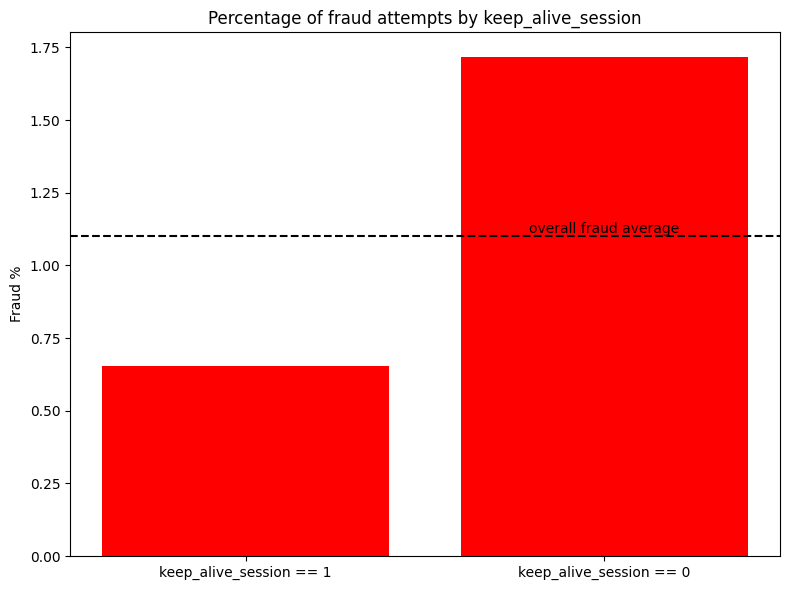

In [398]:
fv.nominal_binary(data_types['nominal_binary'])

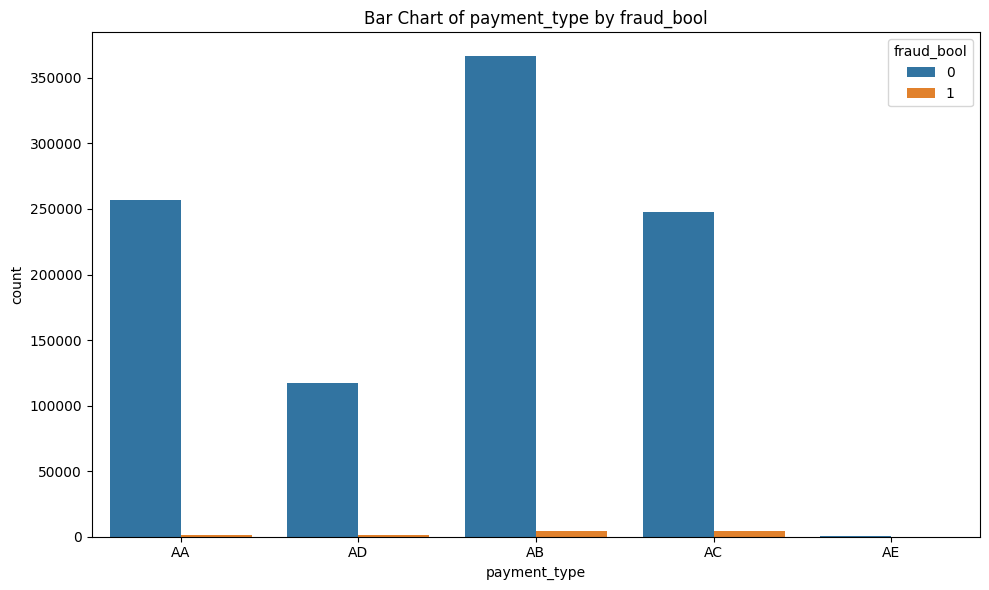

<Figure size 1000x600 with 0 Axes>

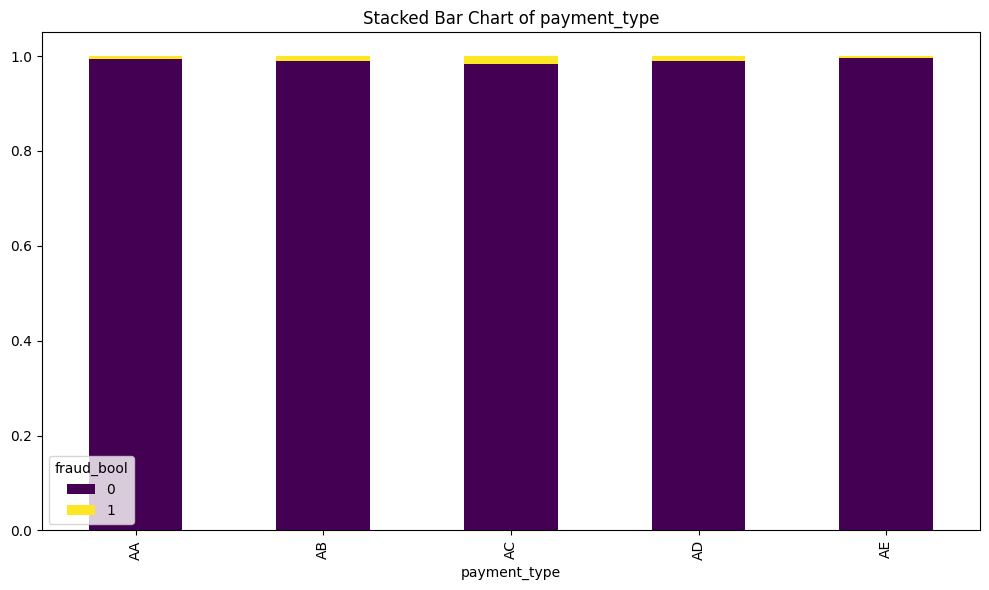

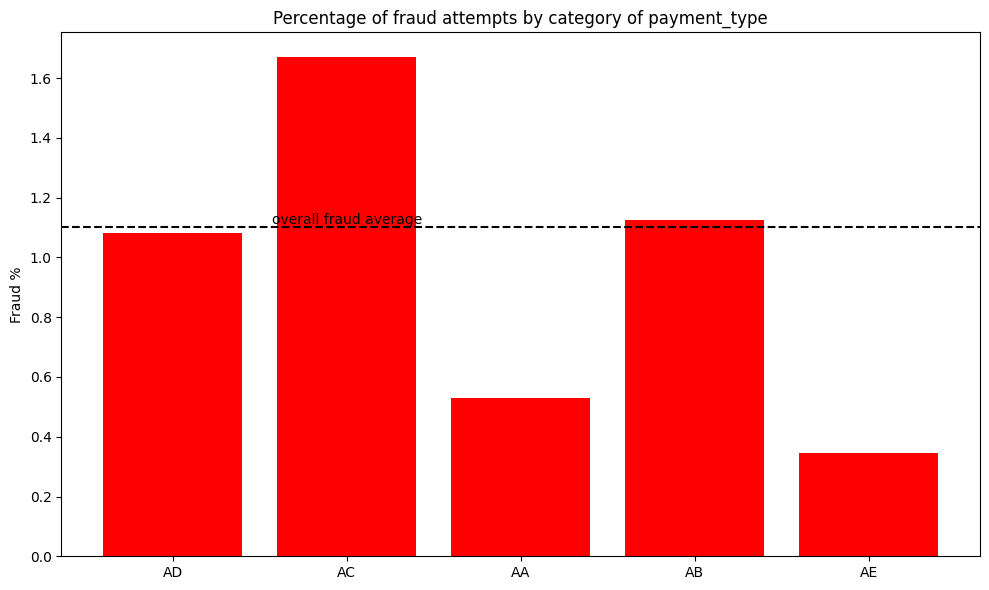

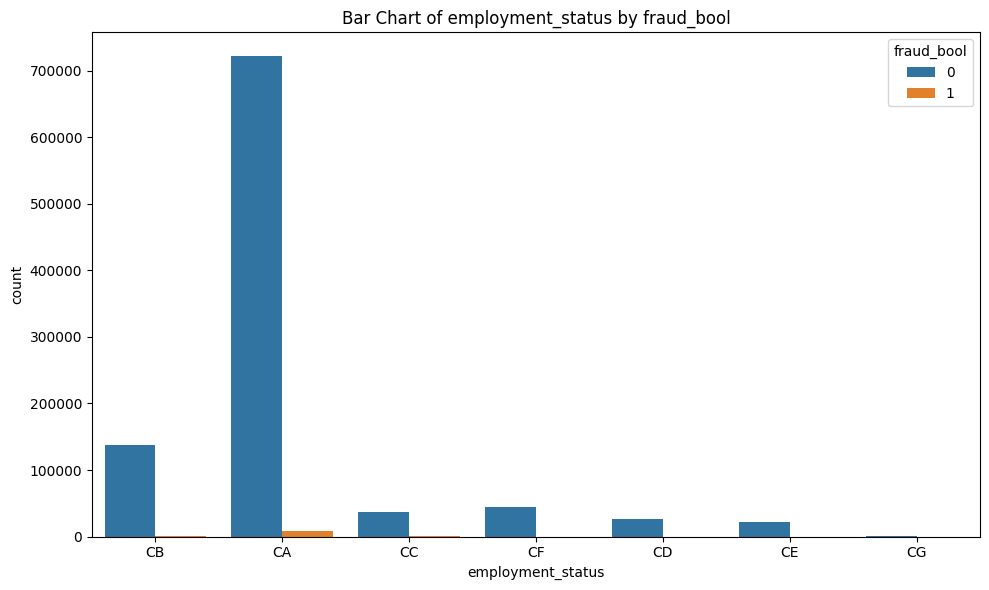

<Figure size 1000x600 with 0 Axes>

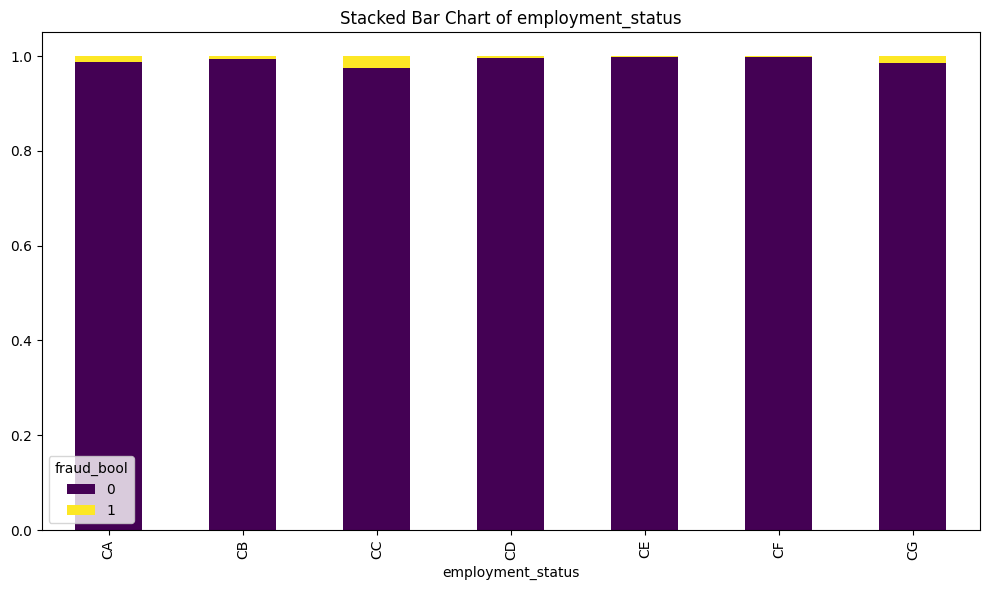

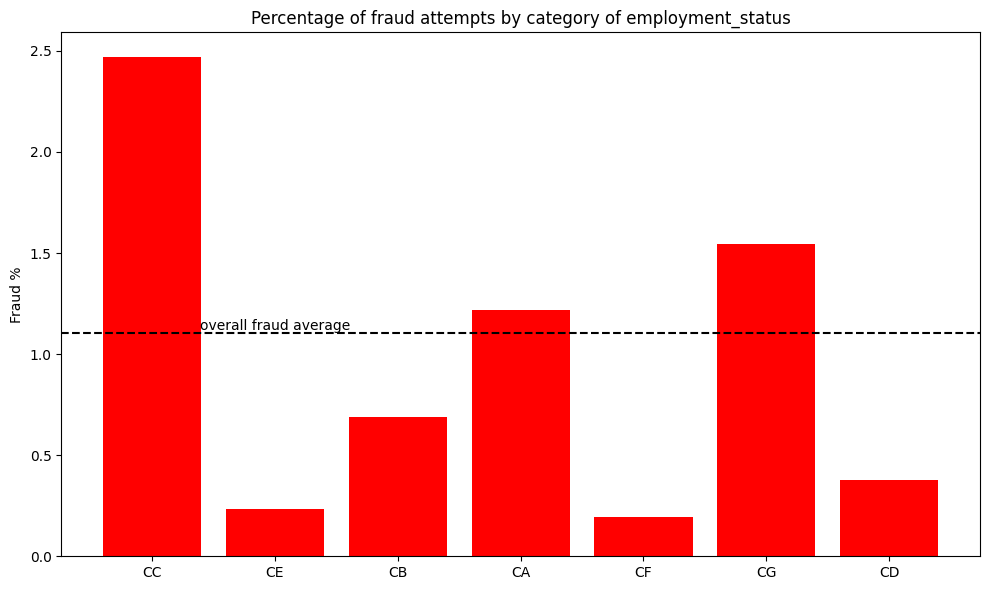

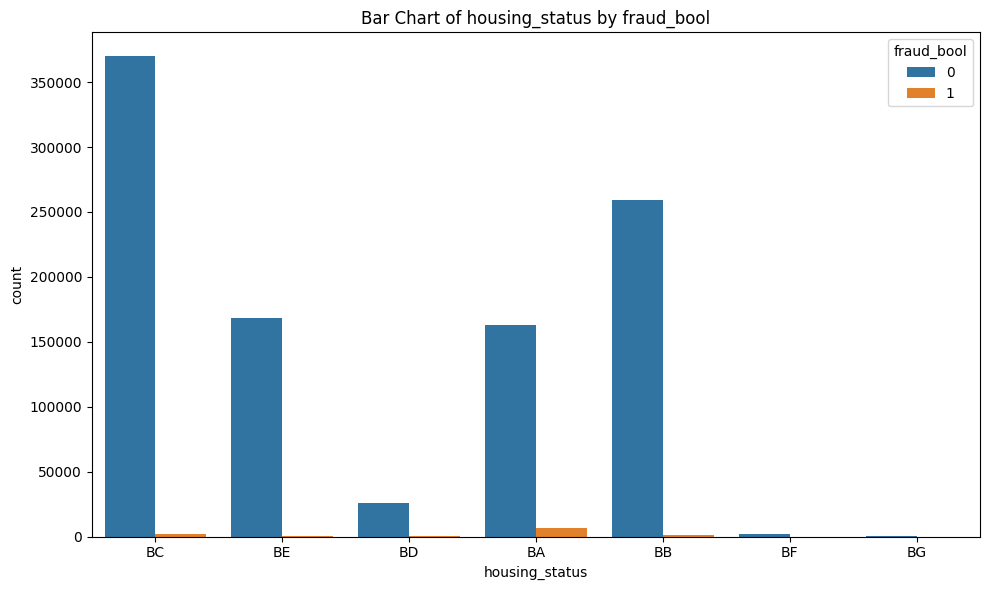

<Figure size 1000x600 with 0 Axes>

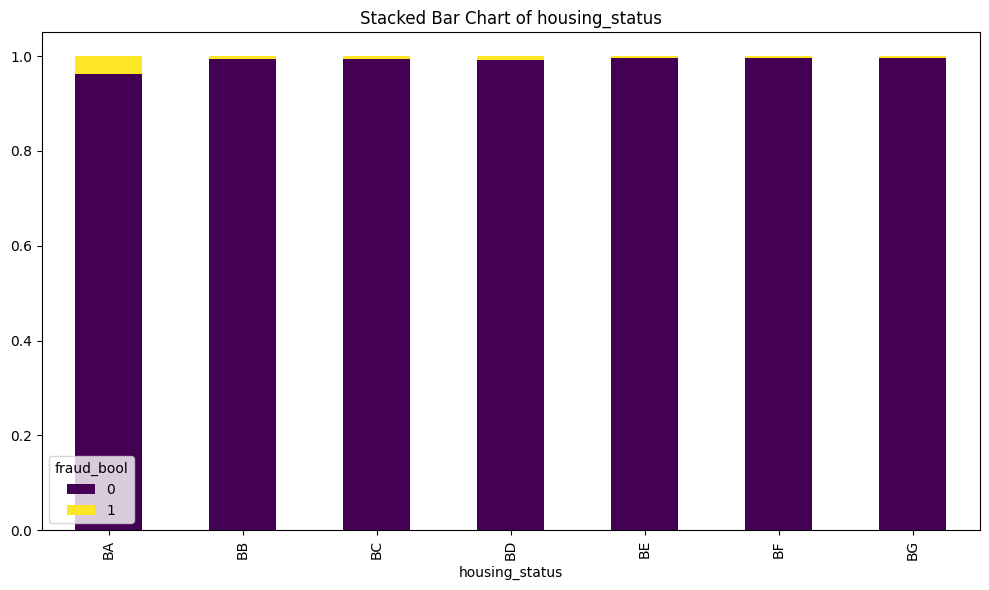

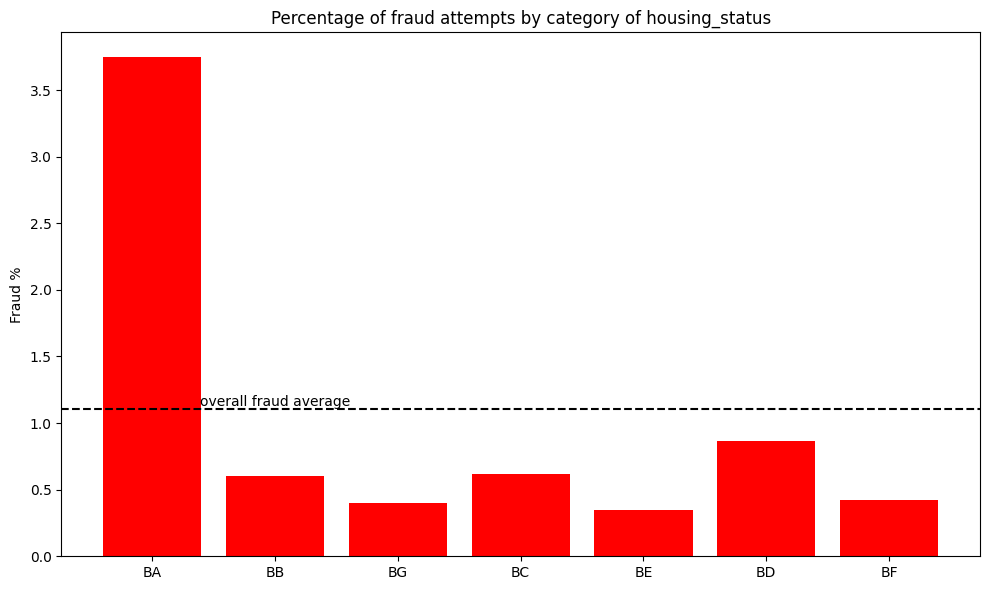

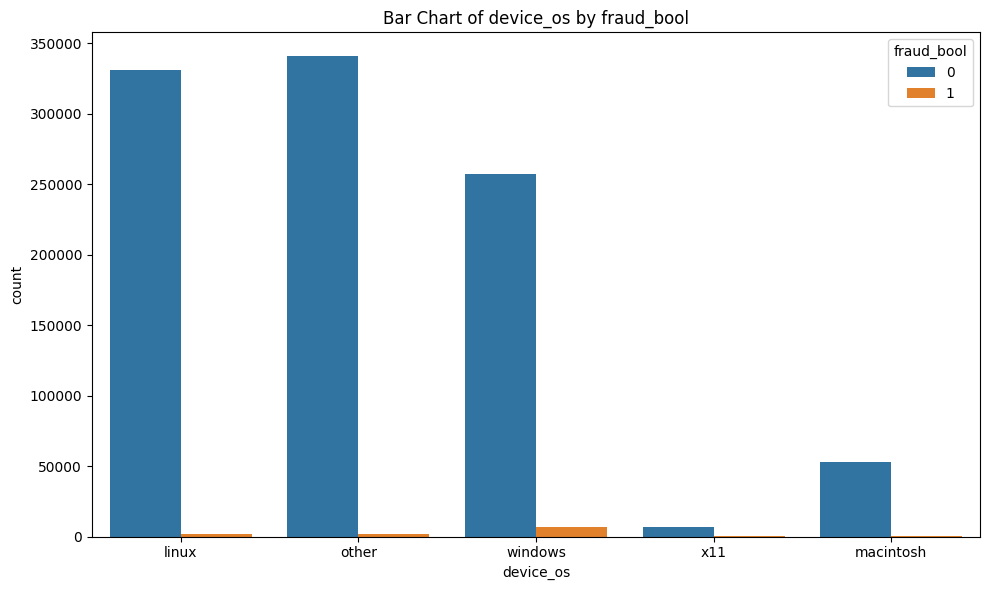

<Figure size 1000x600 with 0 Axes>

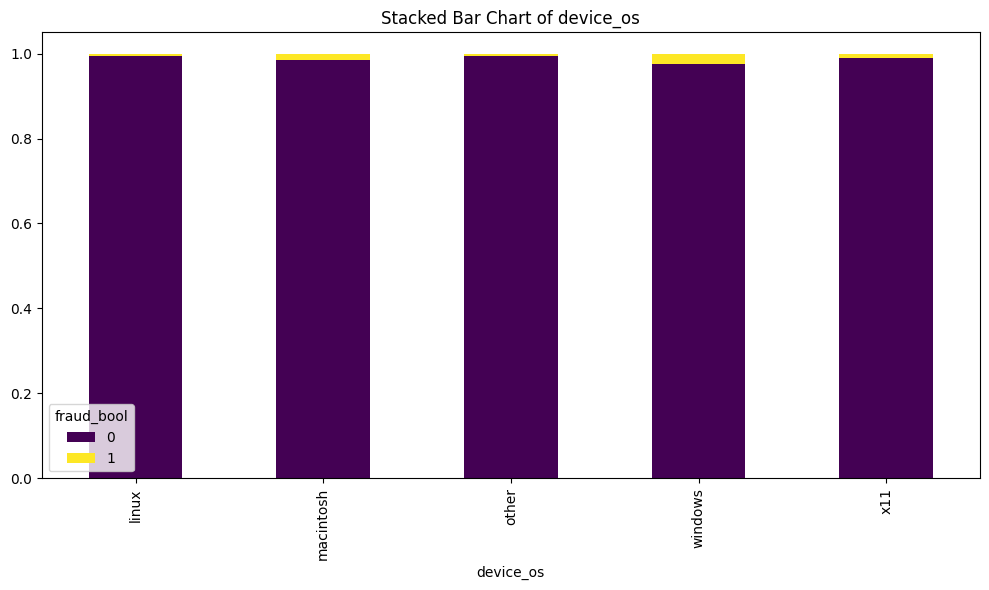

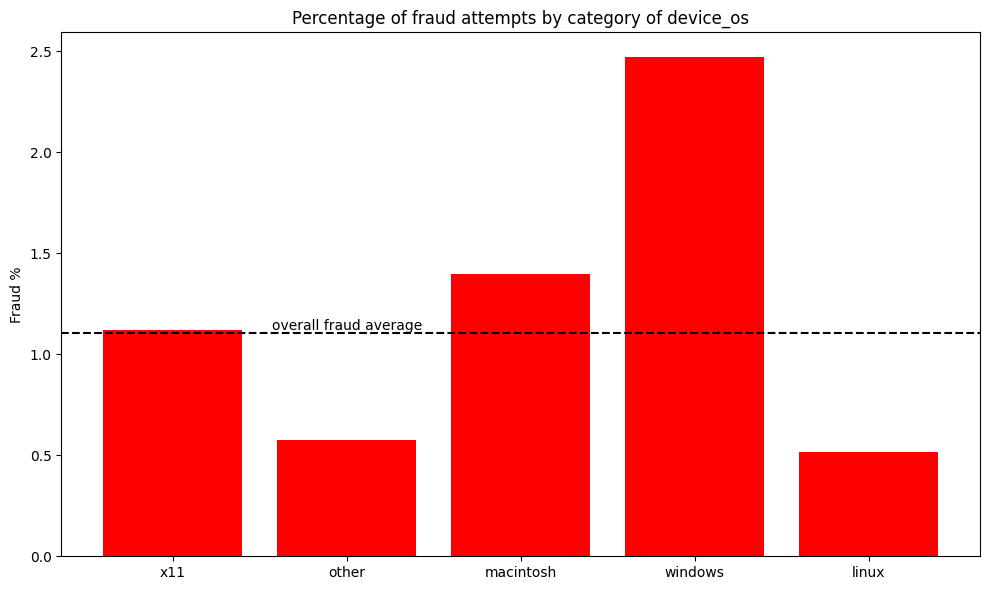

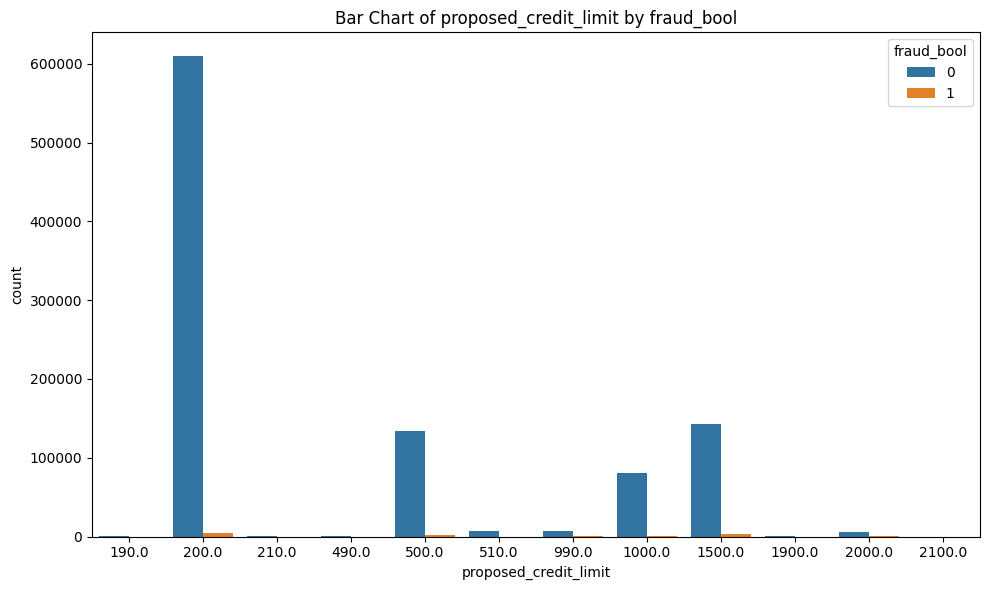

<Figure size 1000x600 with 0 Axes>

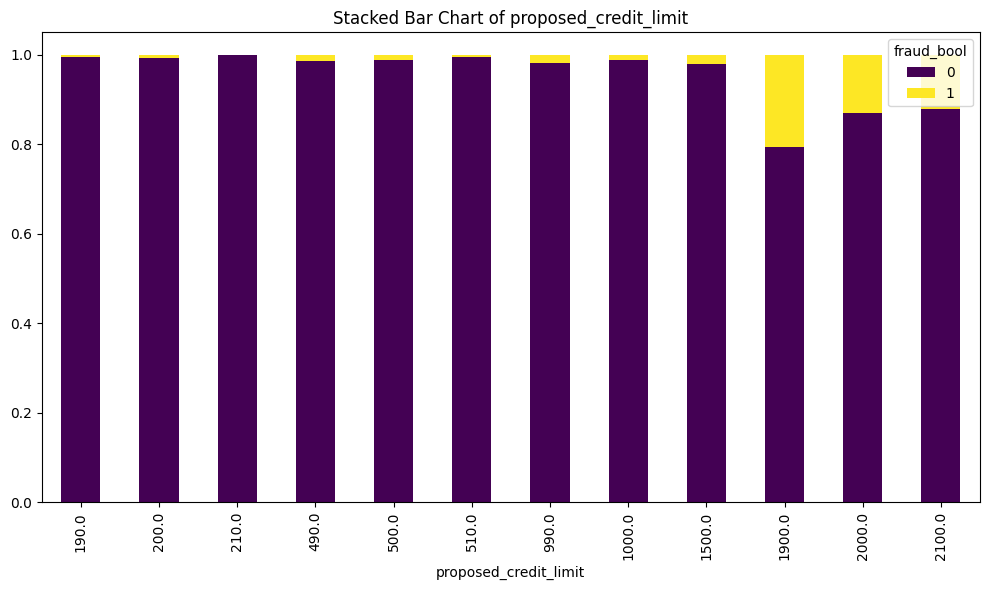

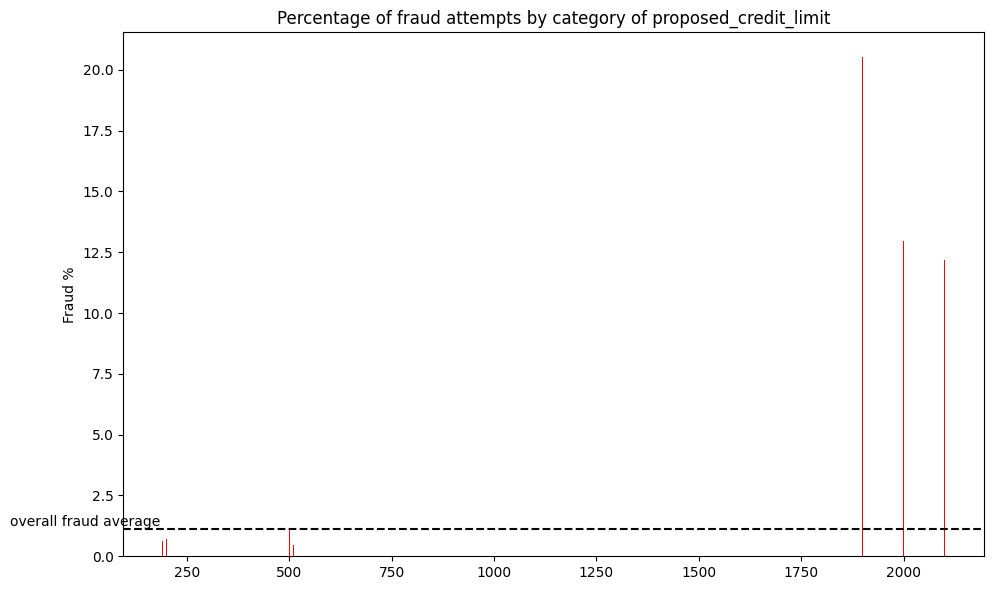

In [399]:
fv.nominal_multi_category(data_types['nominal_multi_category'])

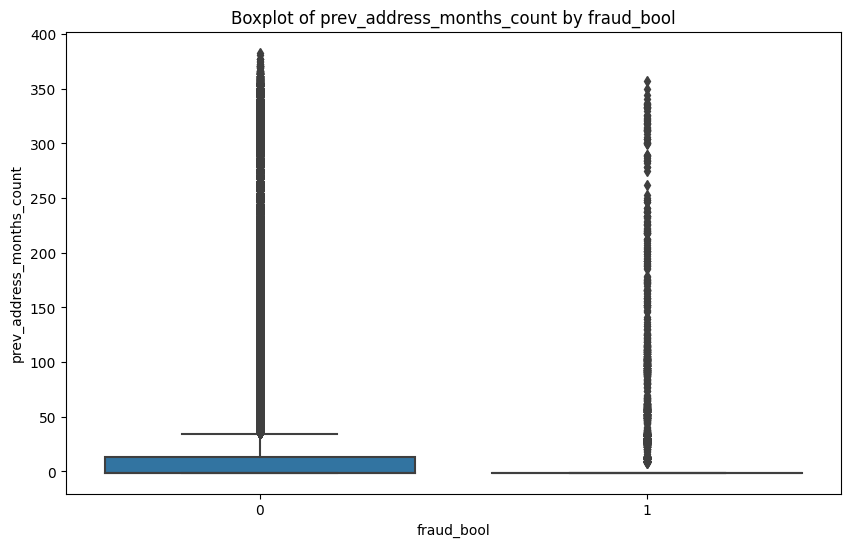

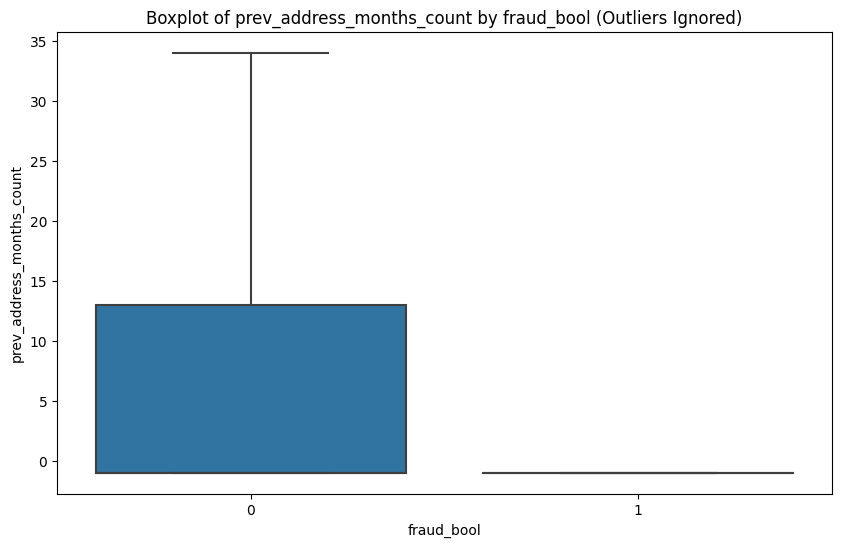

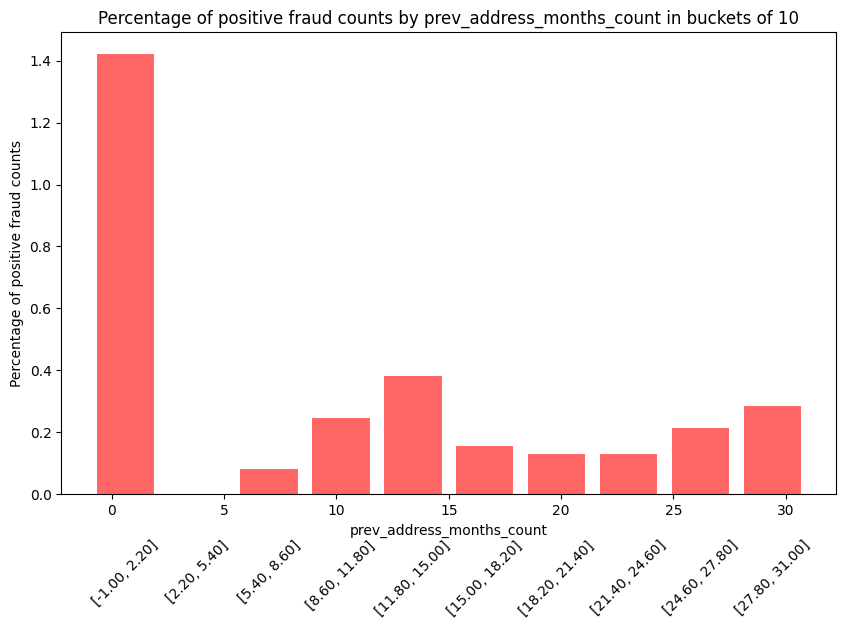

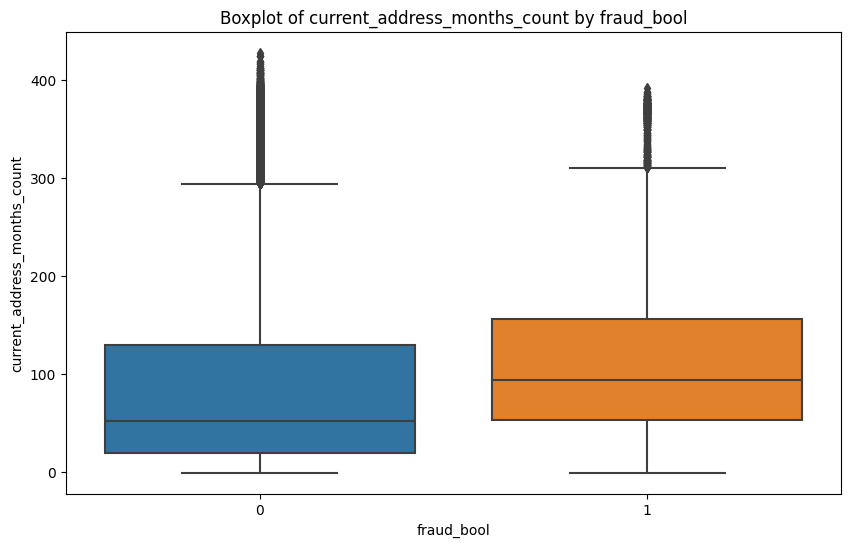

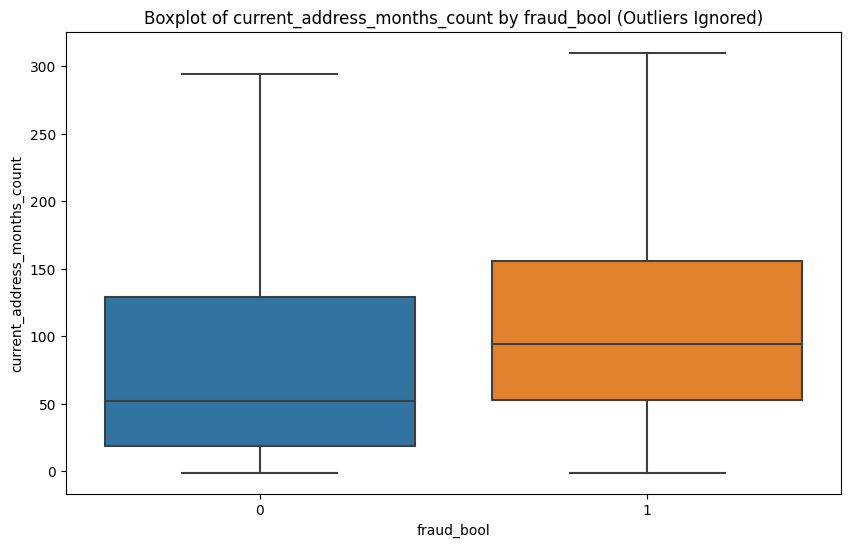

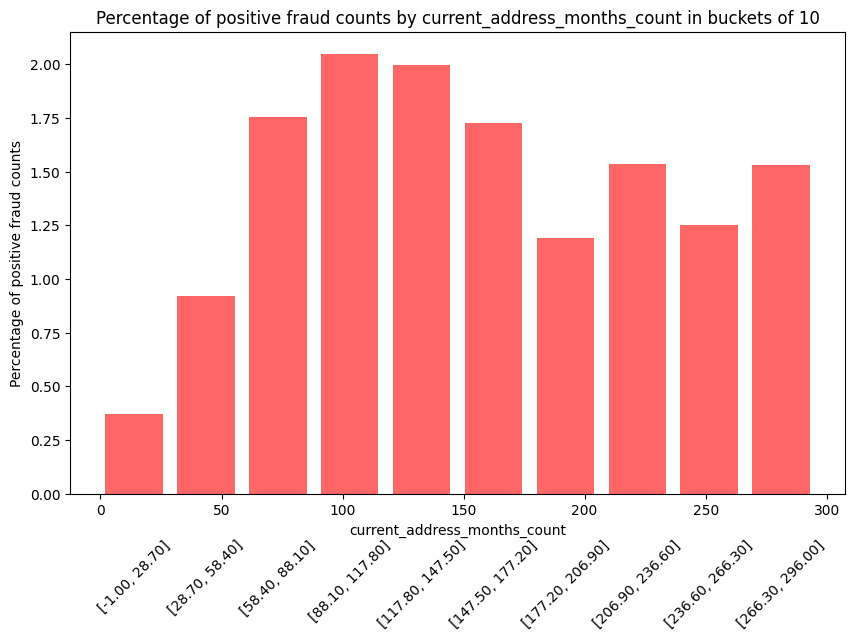

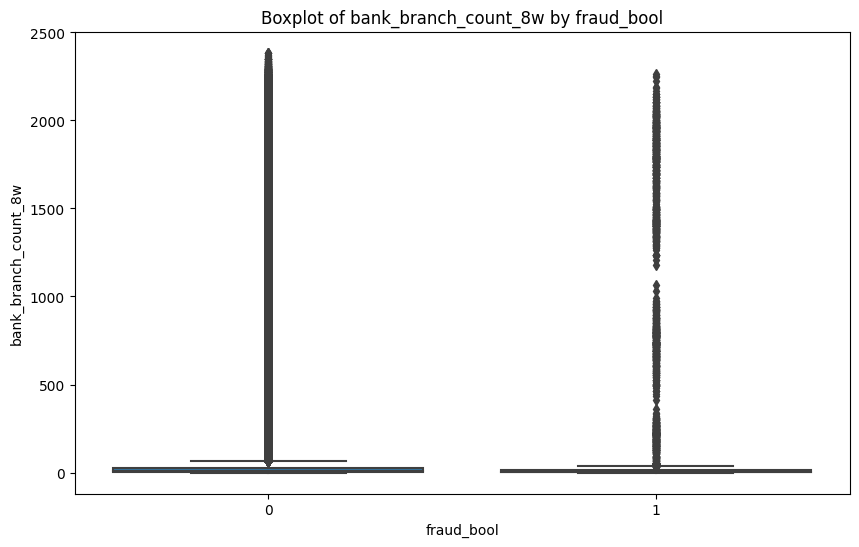

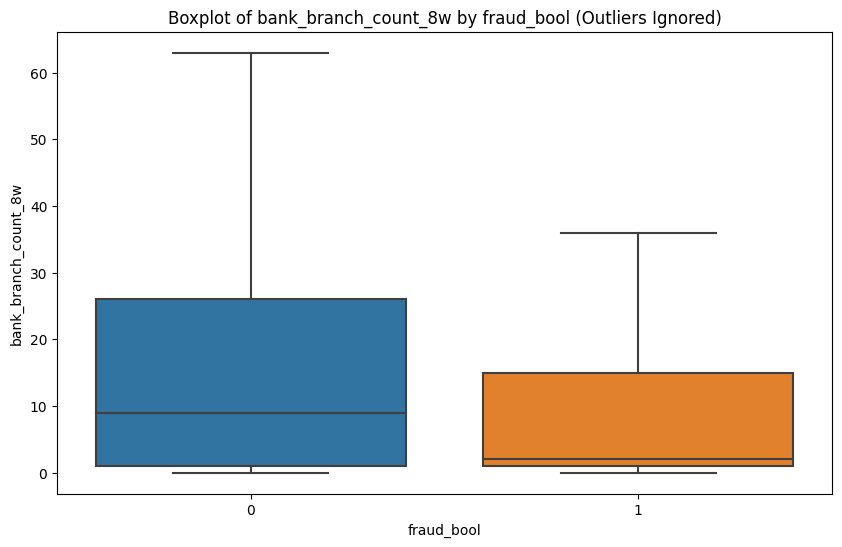

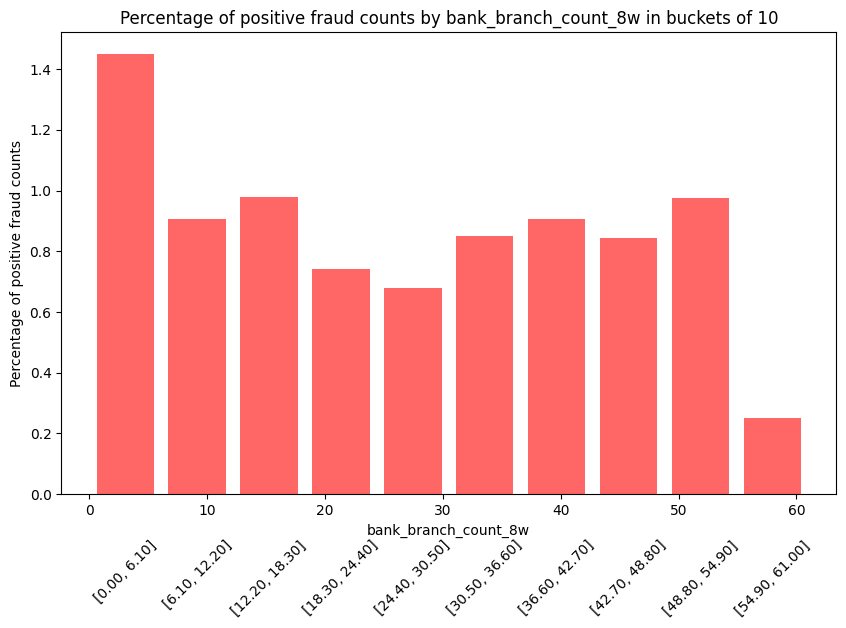

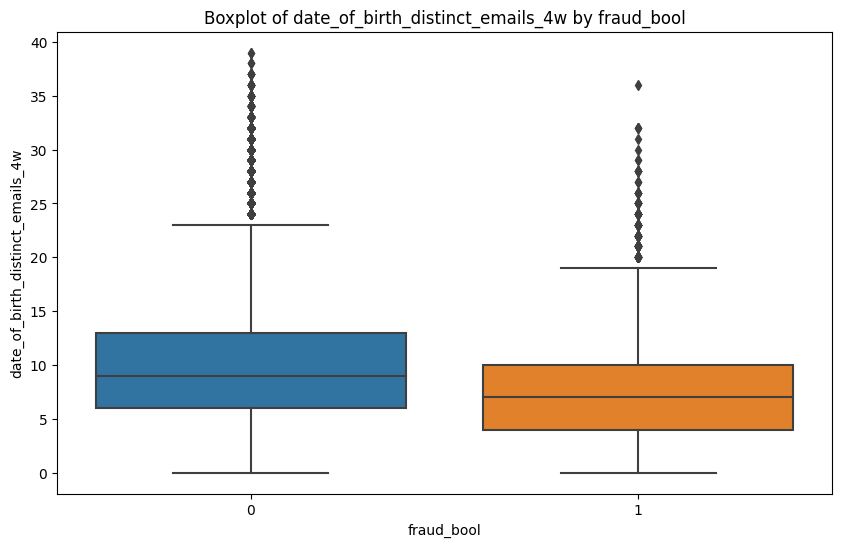

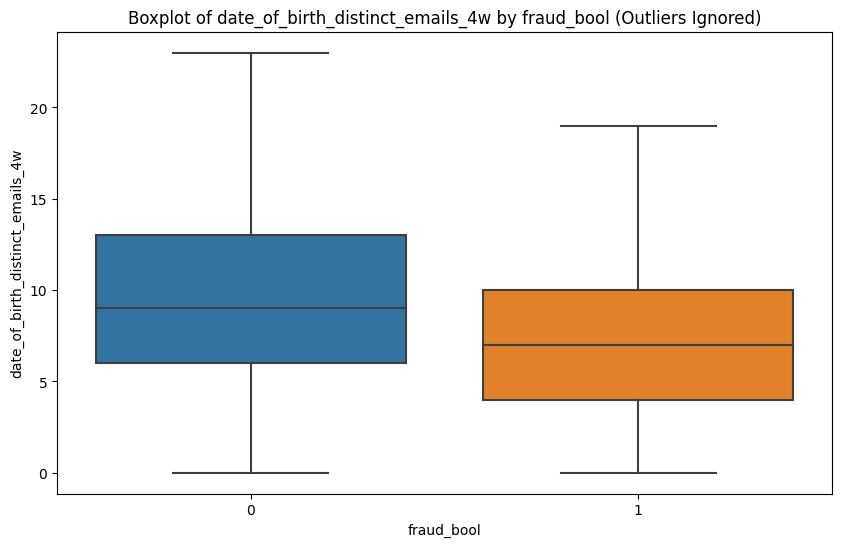

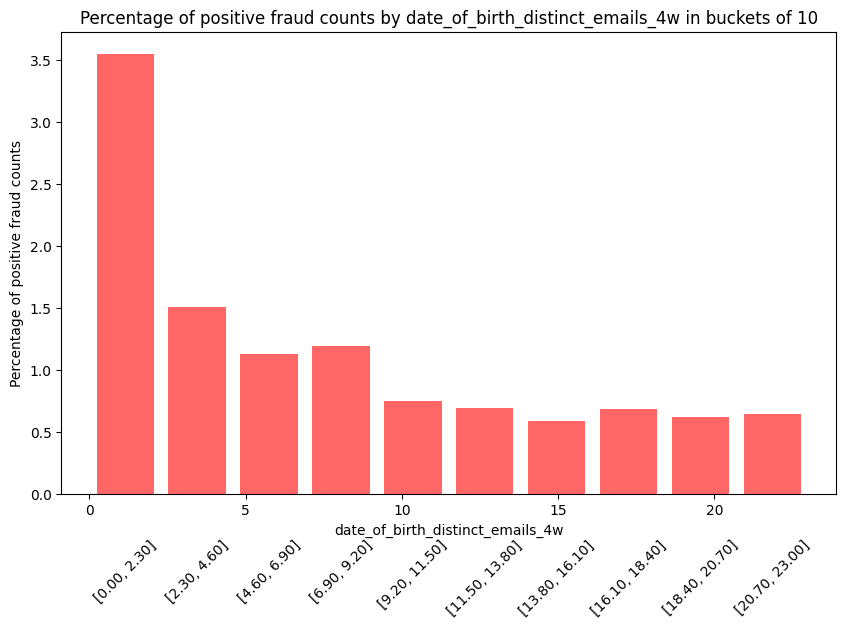

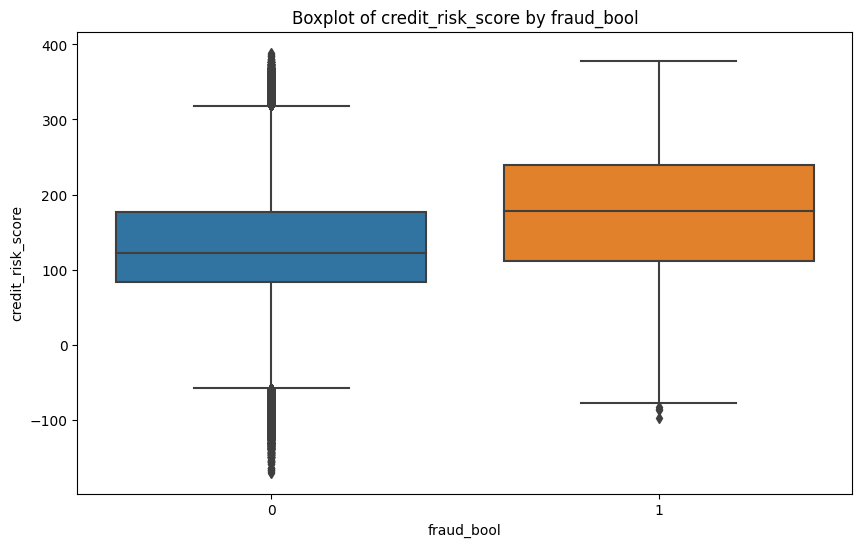

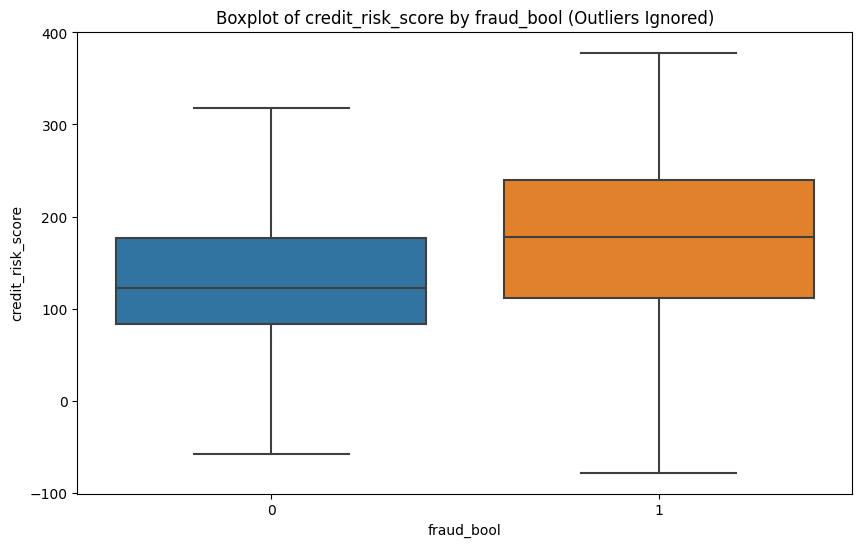

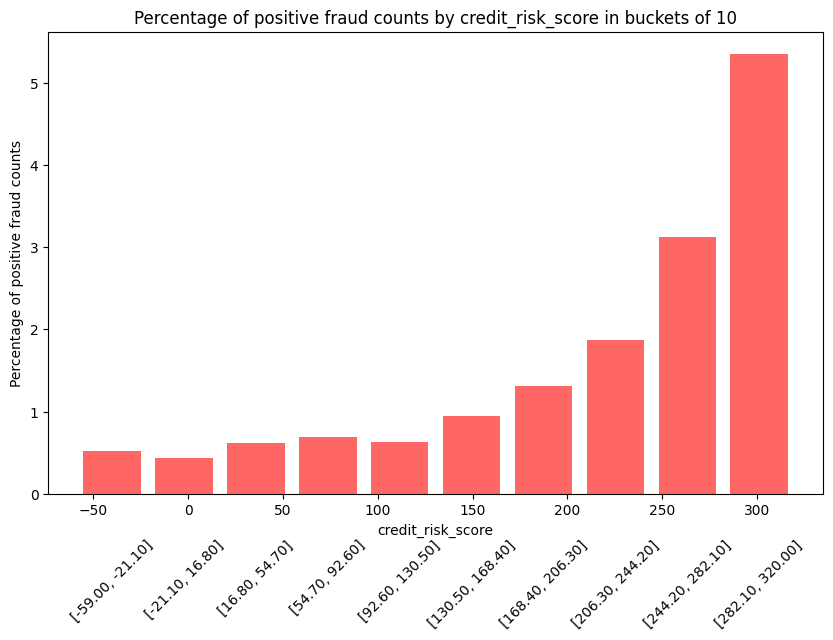

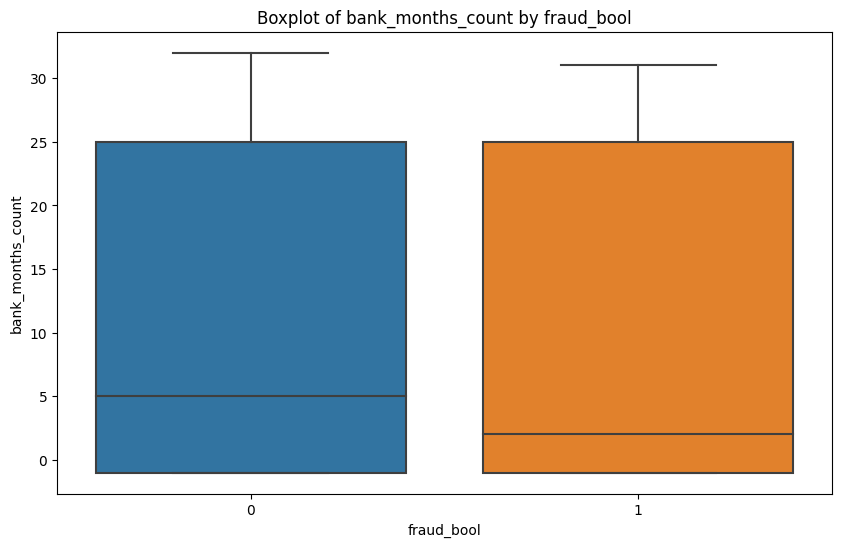

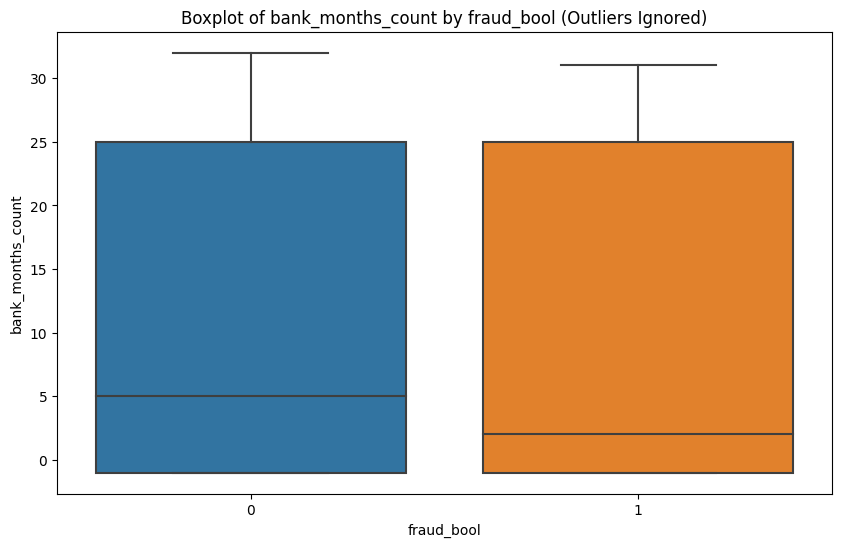

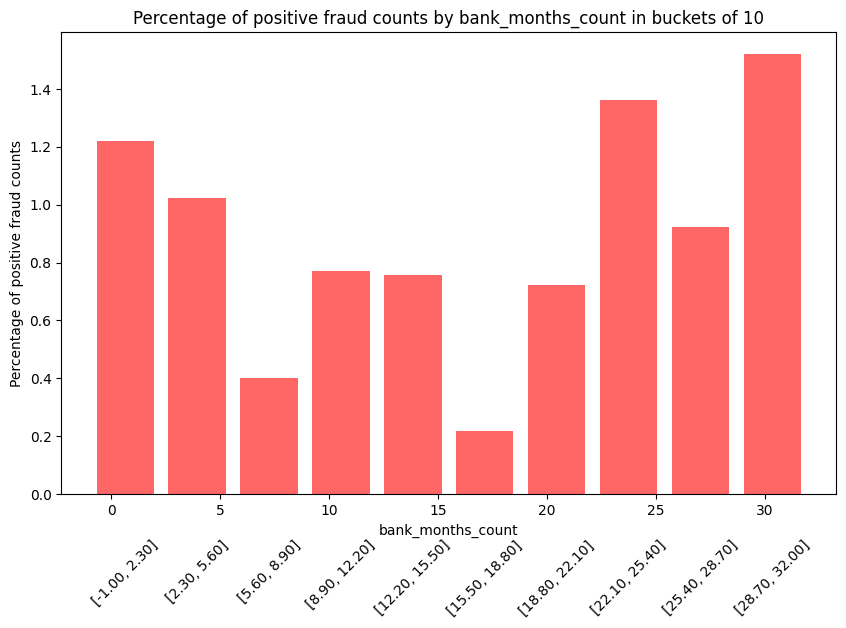

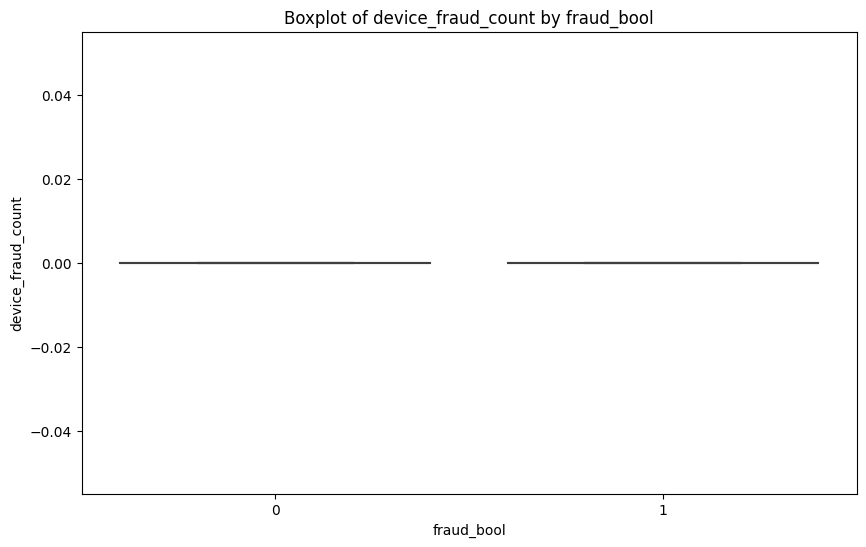

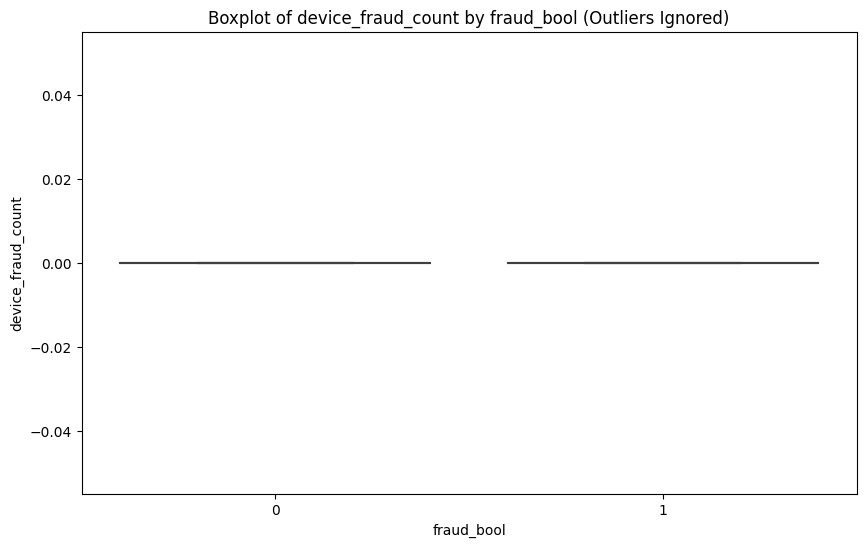

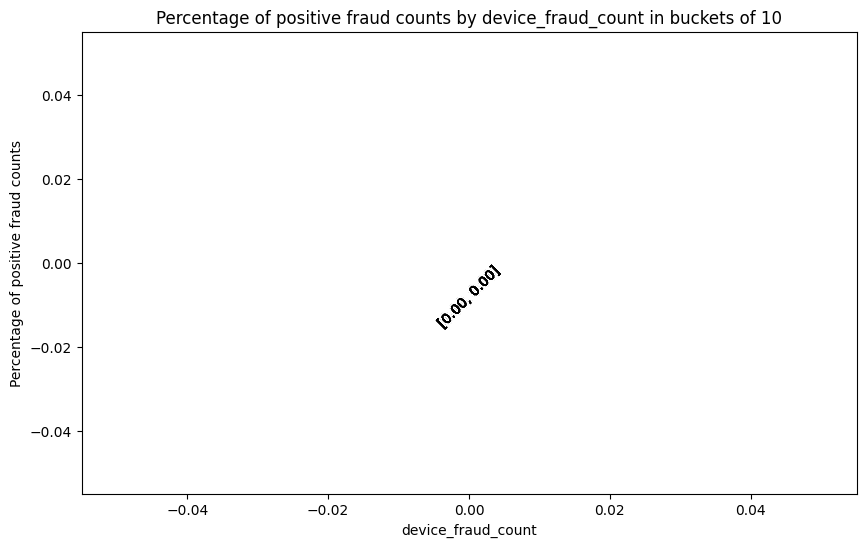

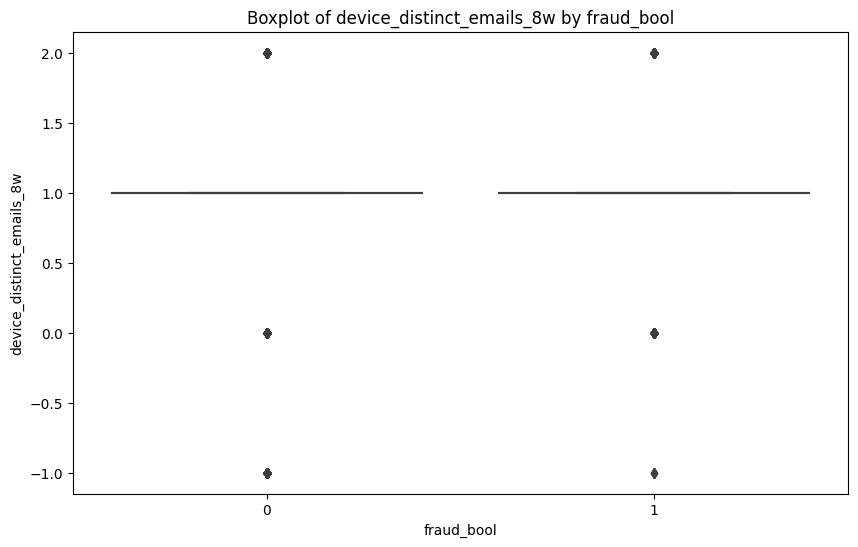

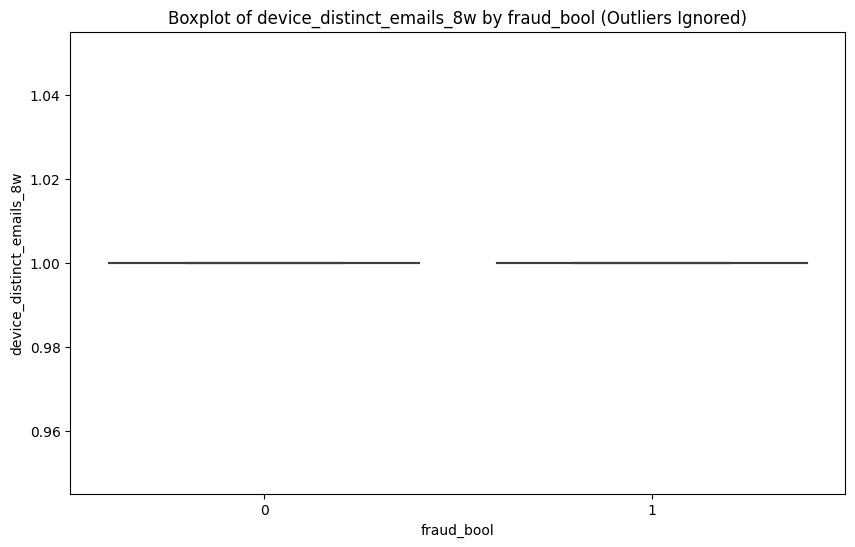

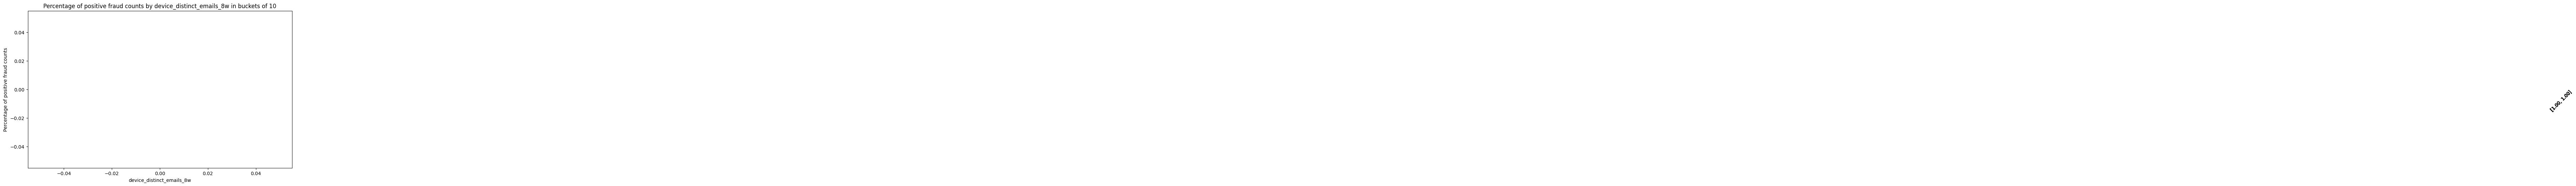

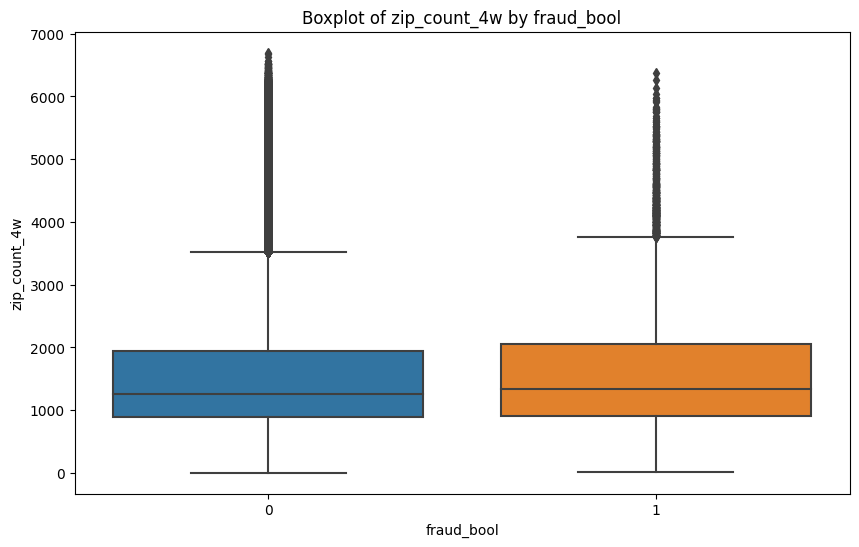

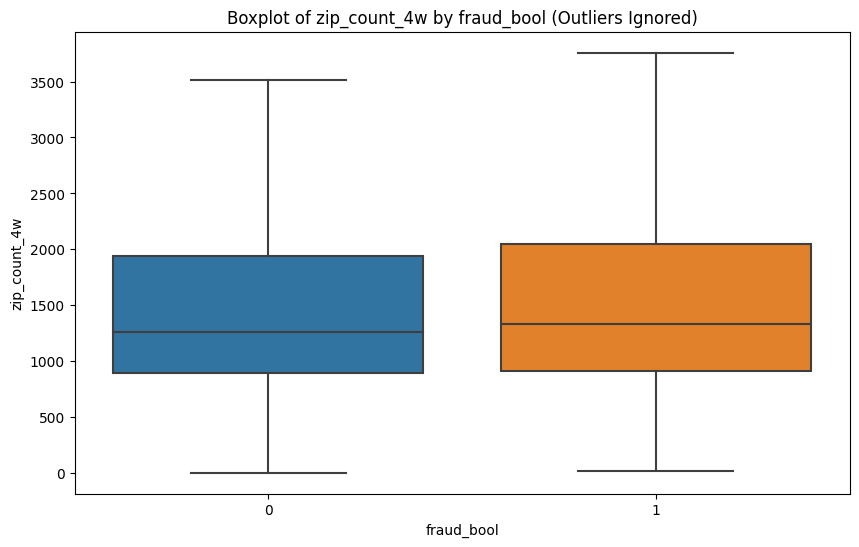

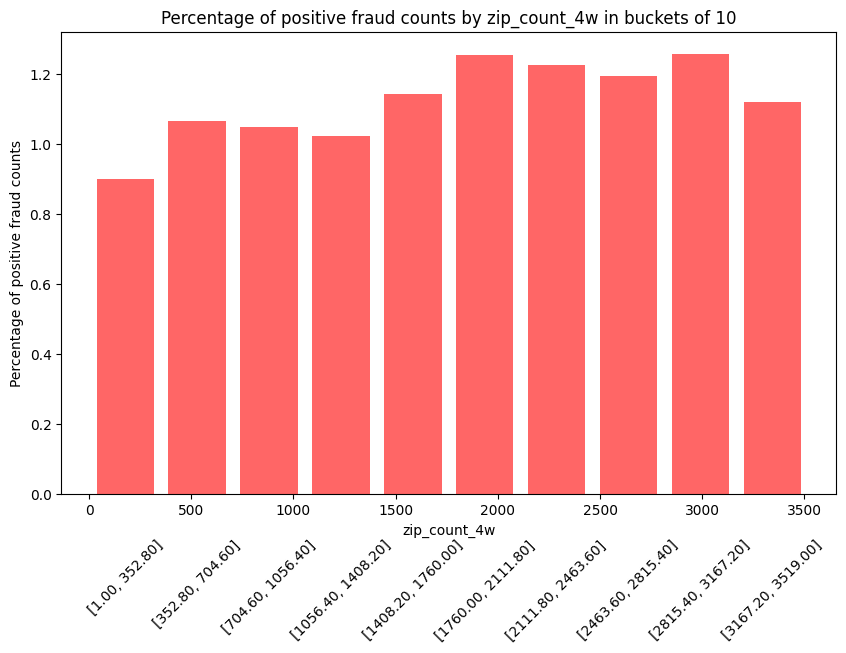

In [400]:
fv.numerical_discrete(data_types['numerical_discrete'])

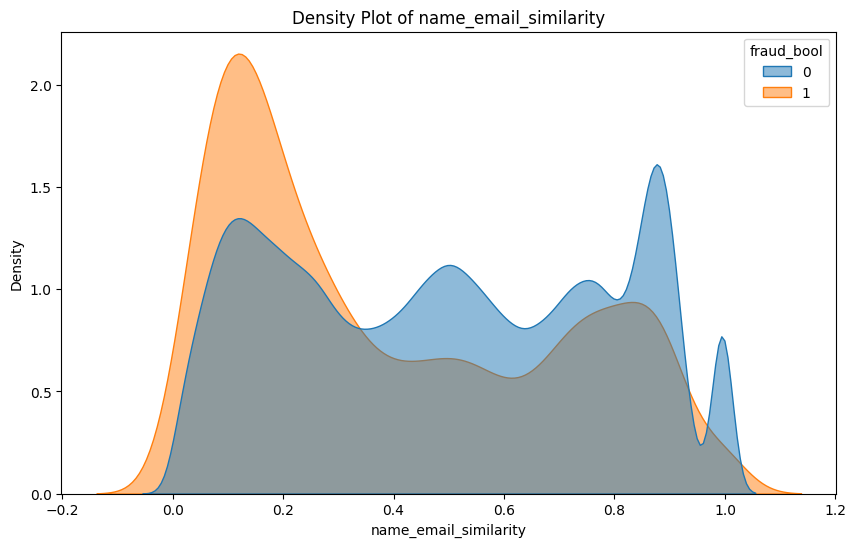

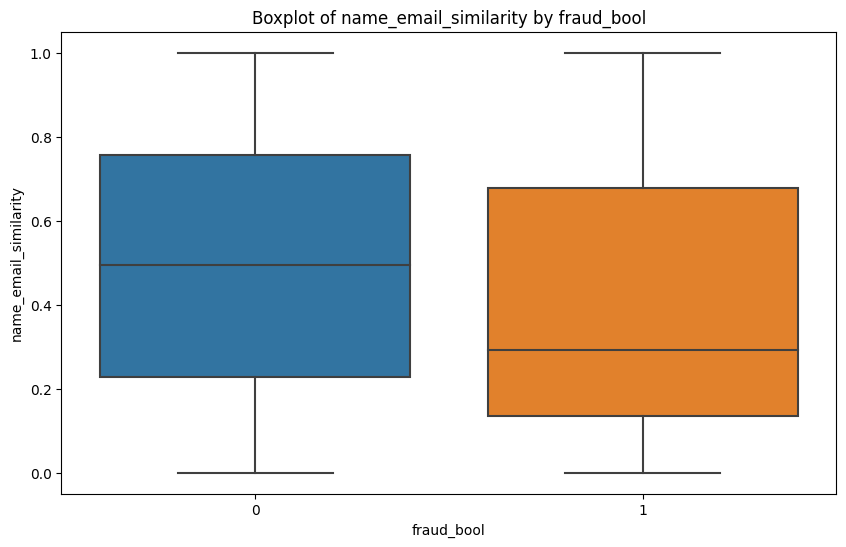

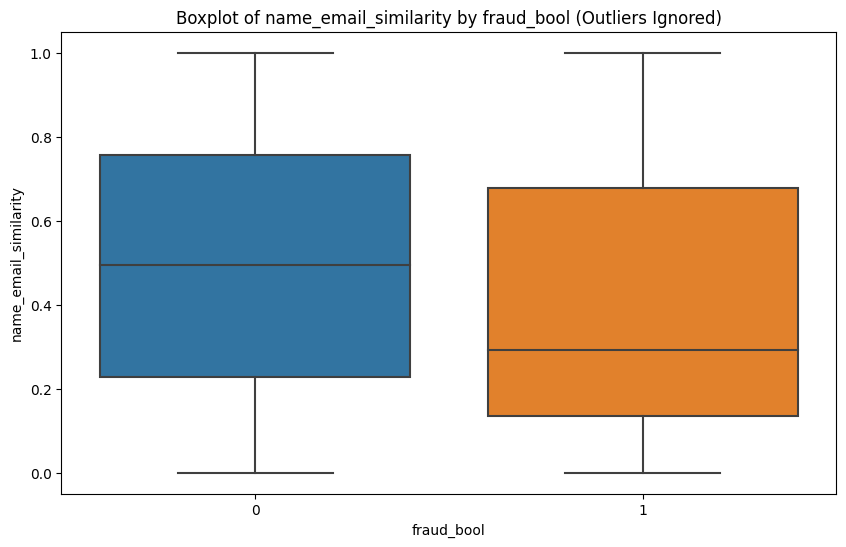

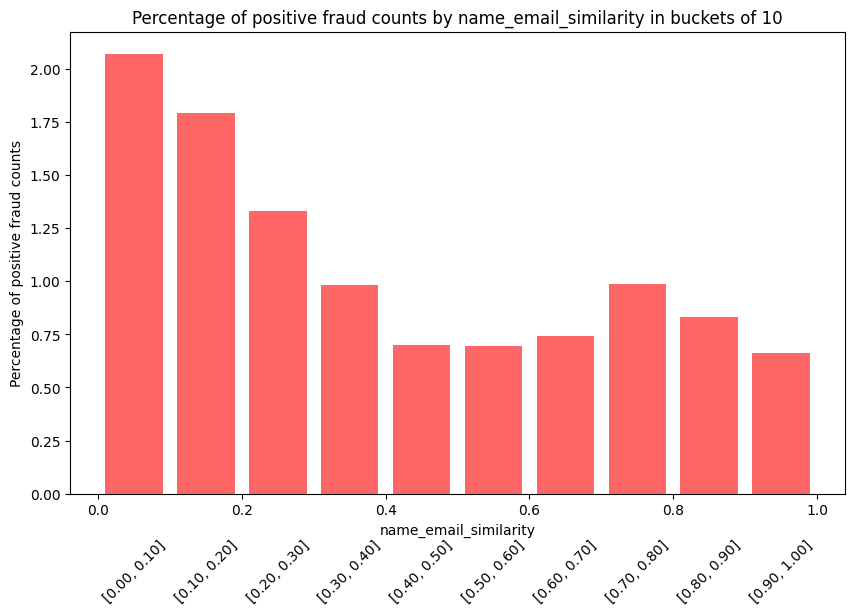

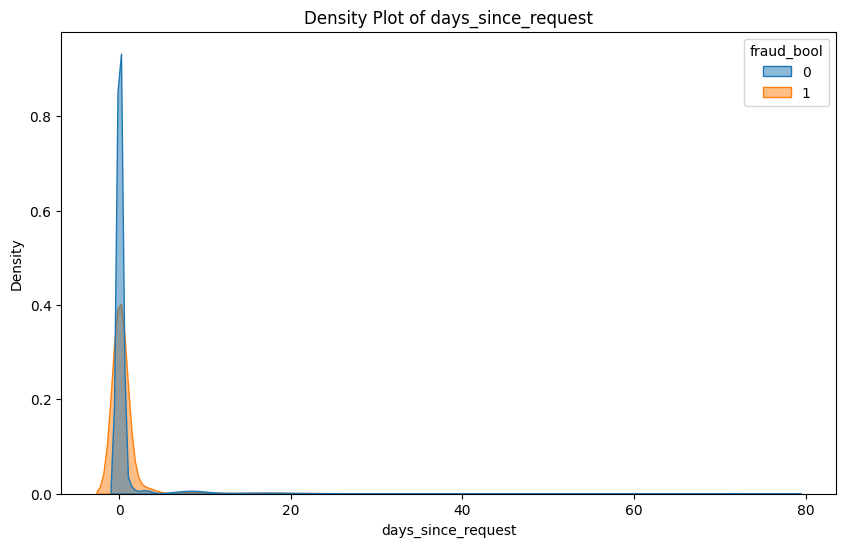

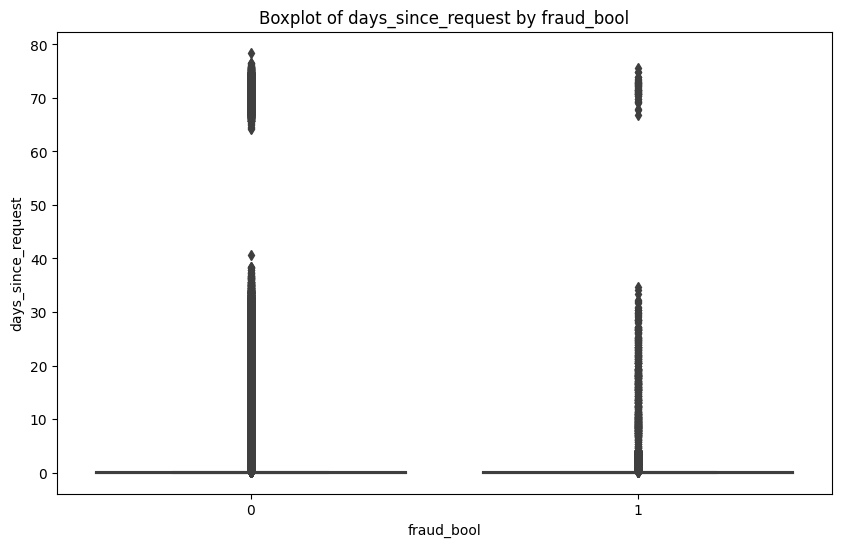

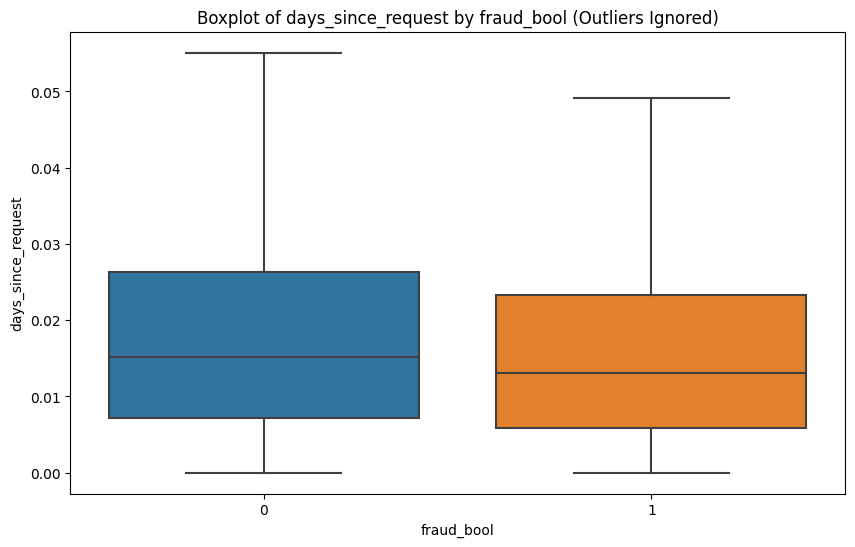

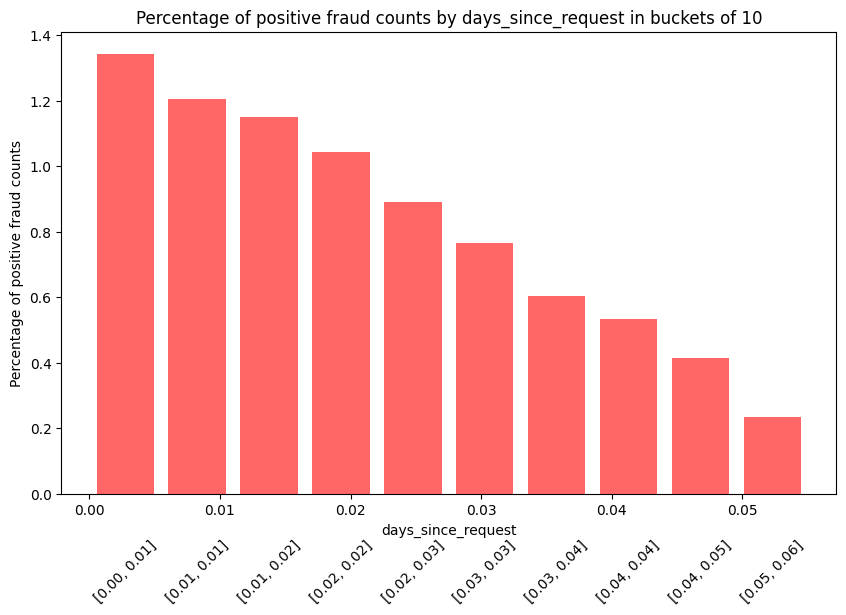

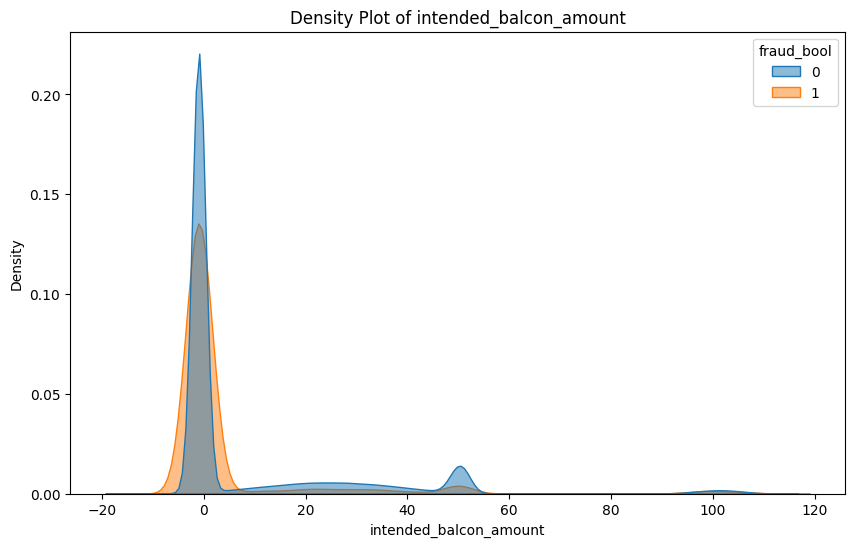

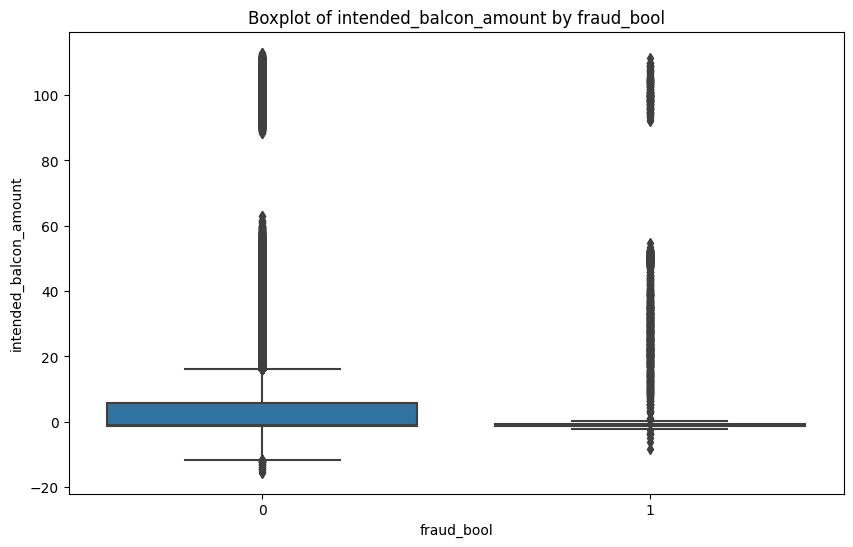

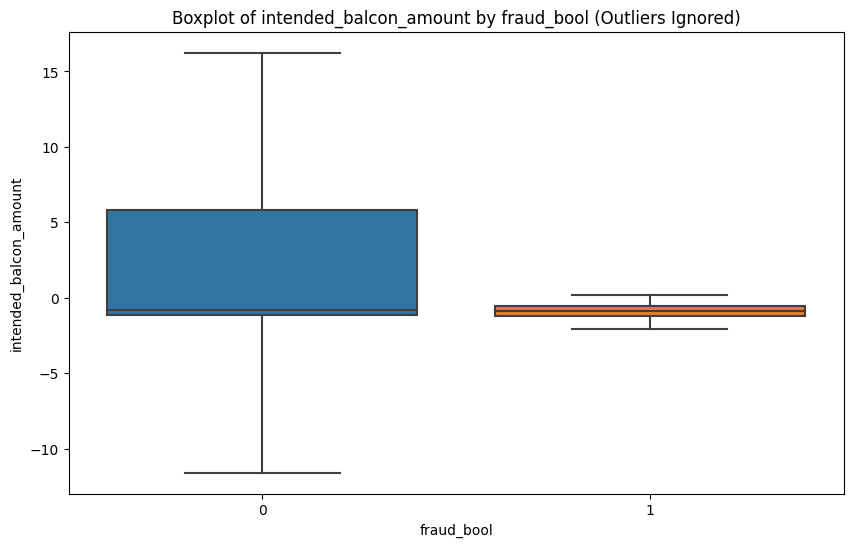

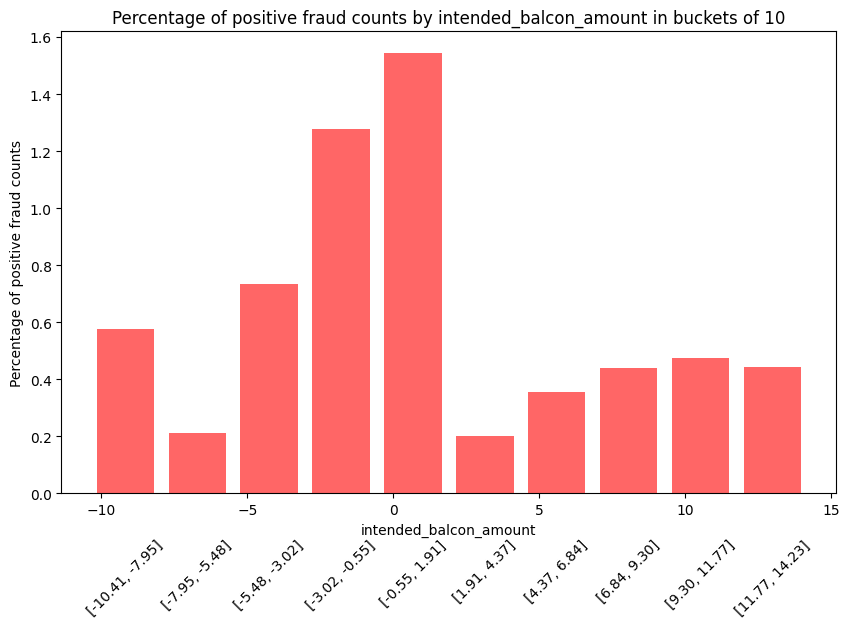

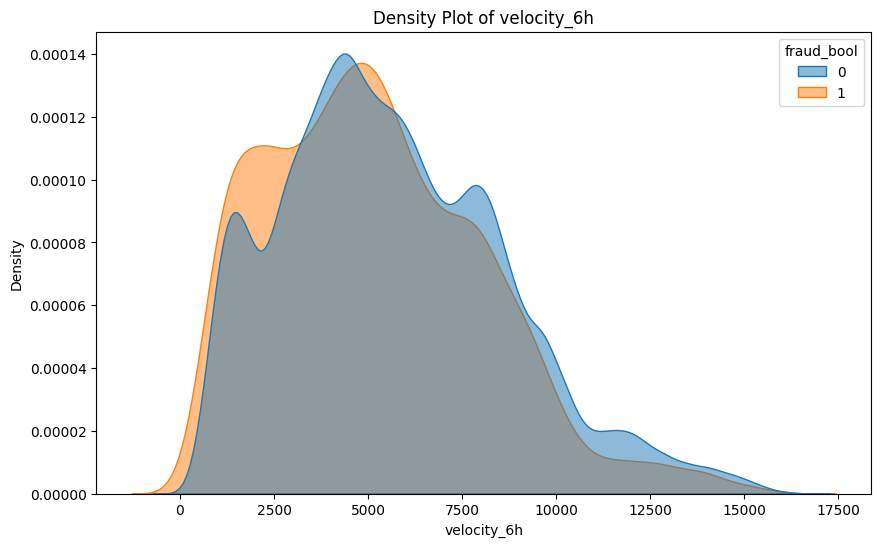

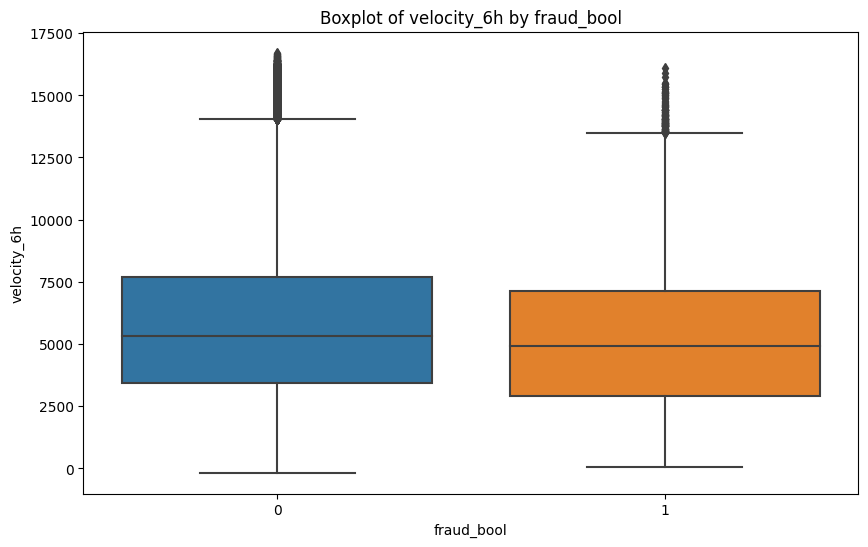

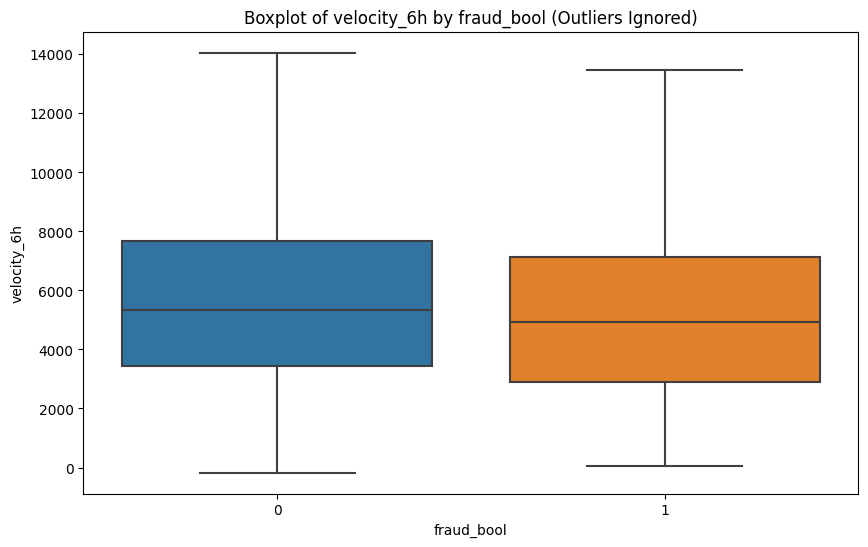

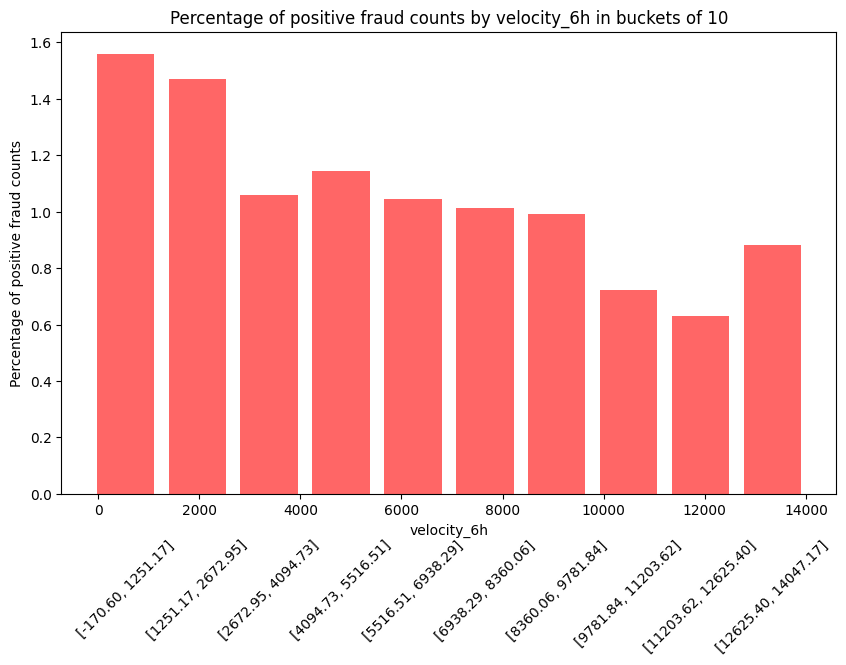

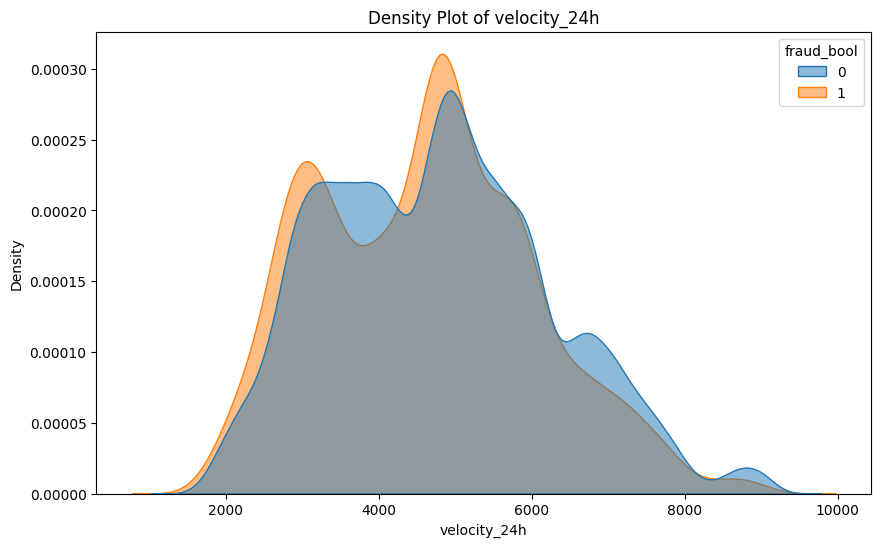

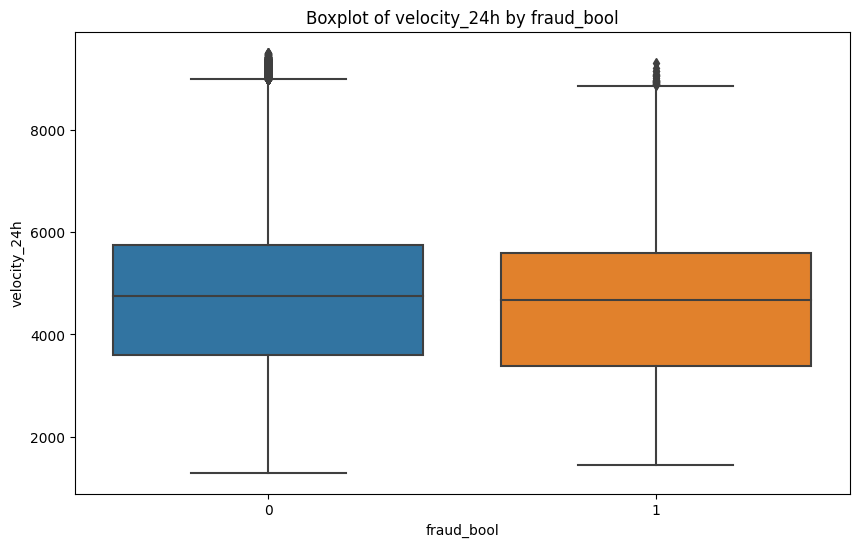

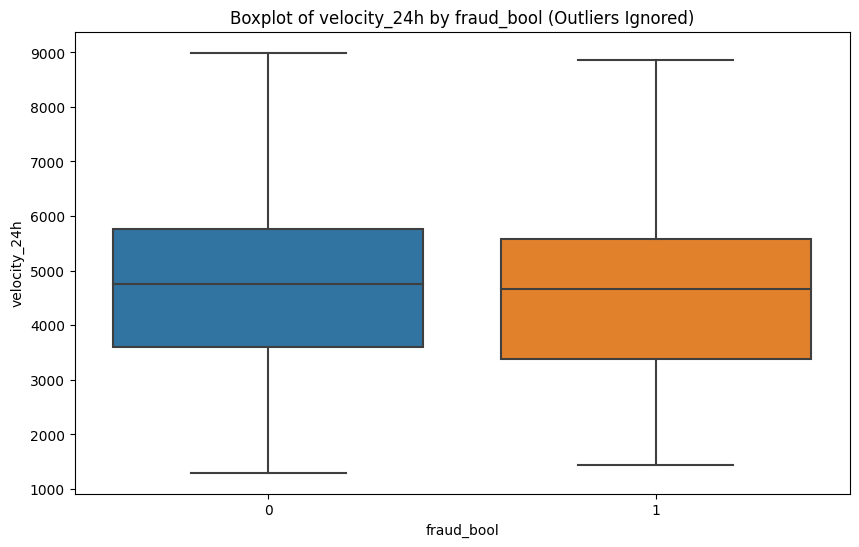

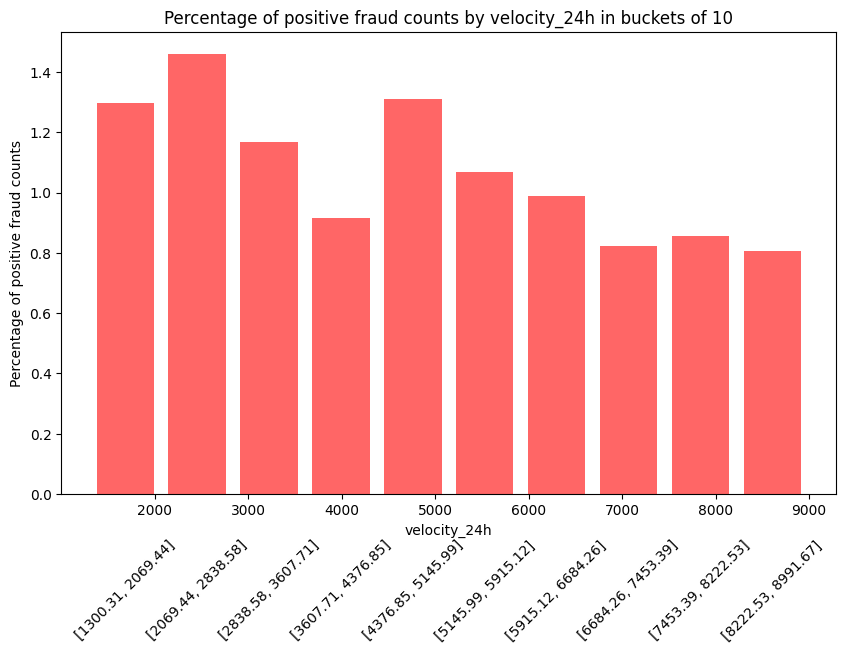

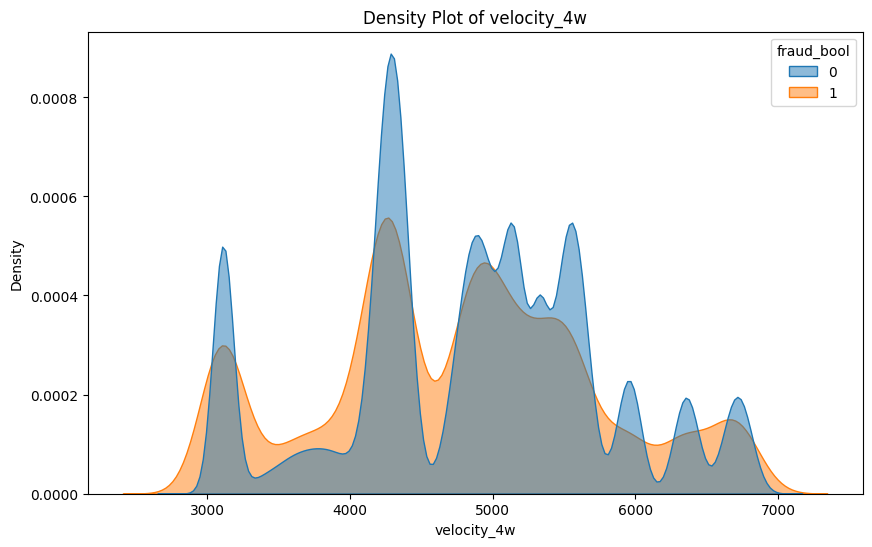

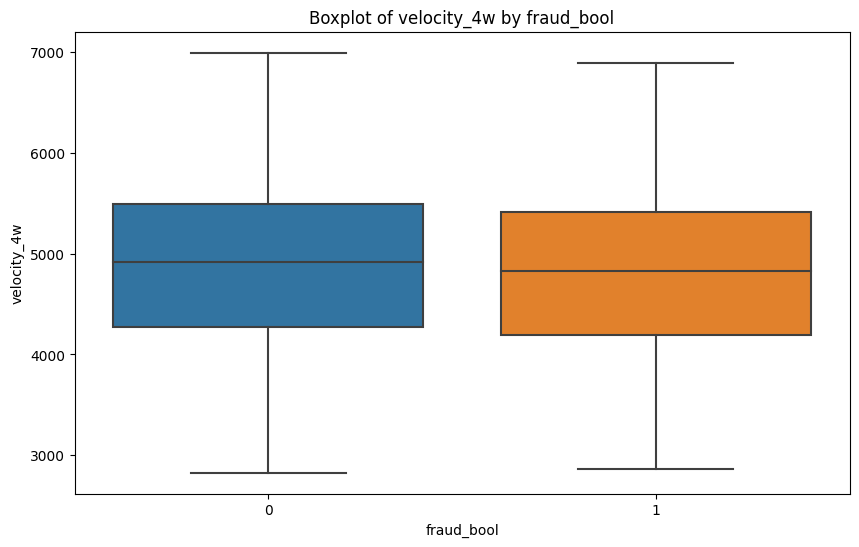

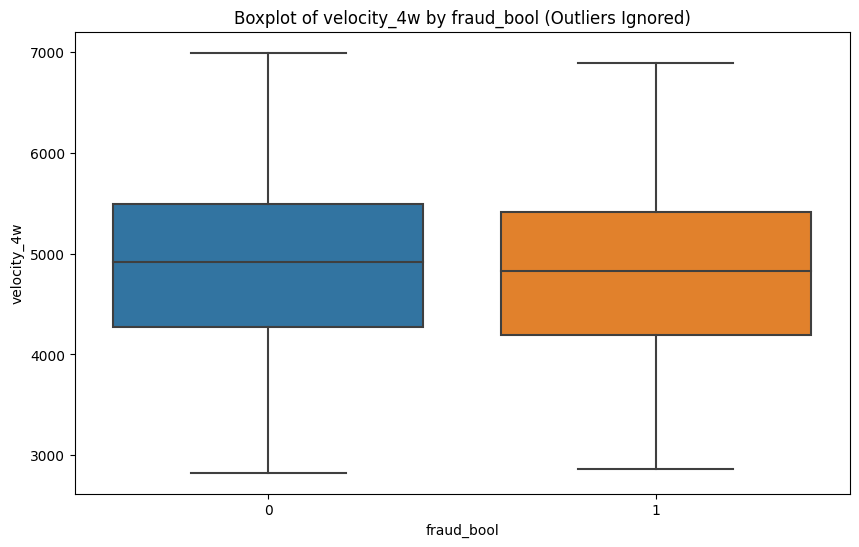

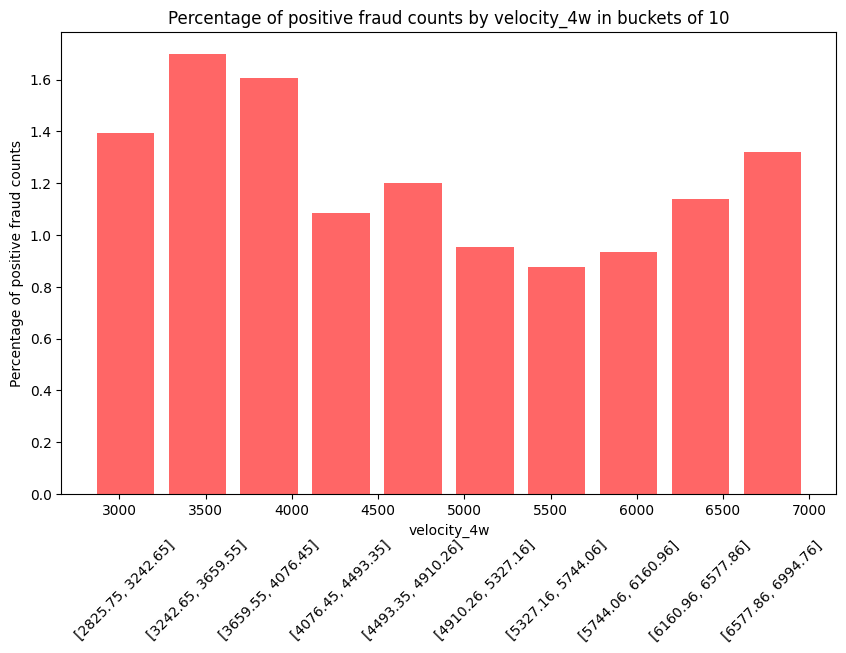

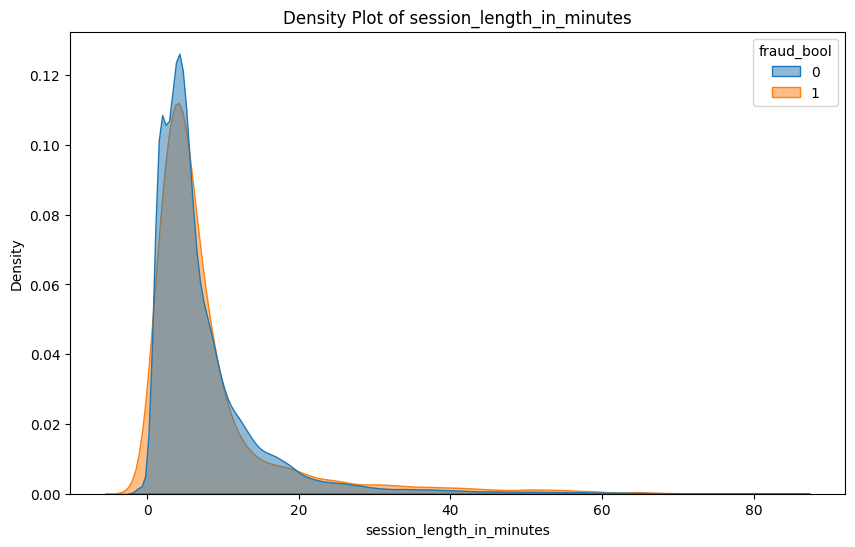

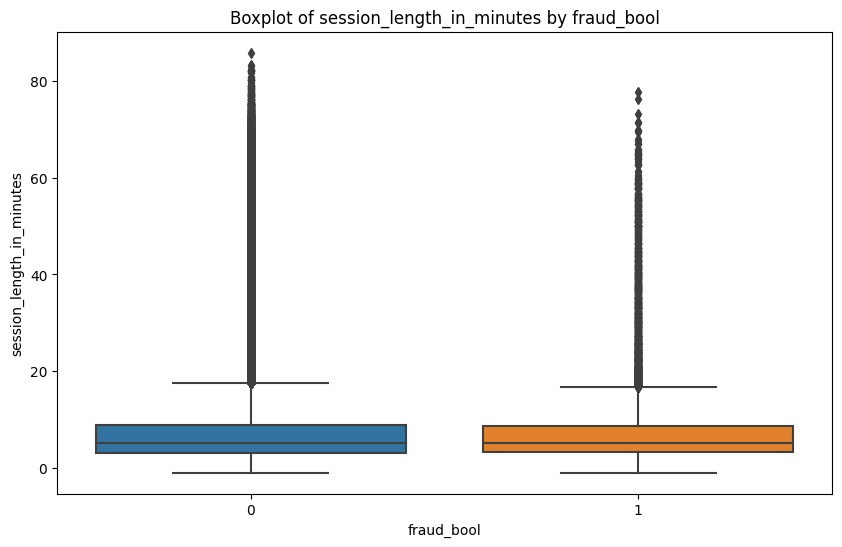

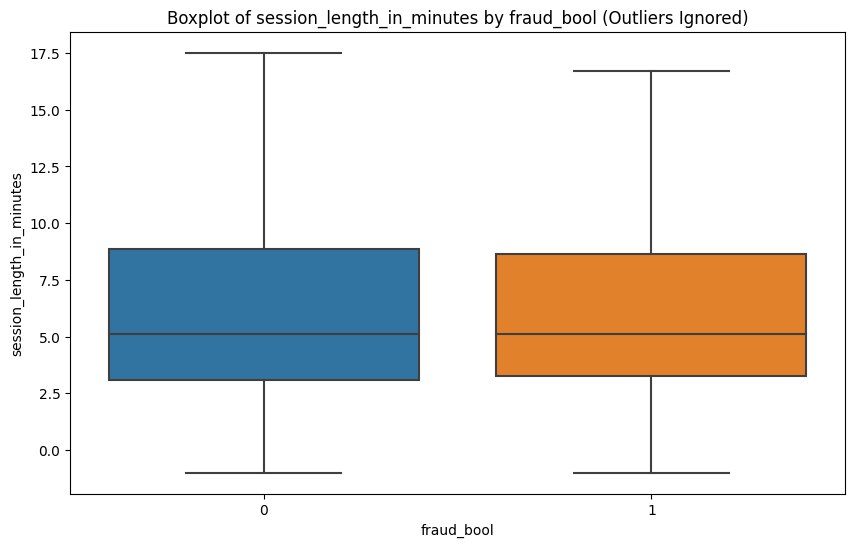

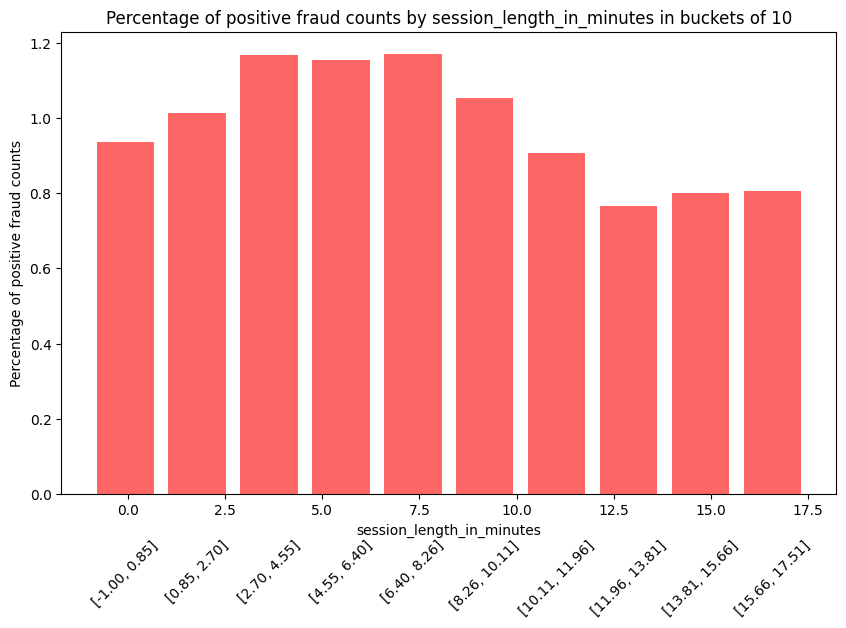

In [401]:
fv.numerical_continuous(data_types['numerical_continuous_bounded']+data_types['numerical_continuous_unbounded'])

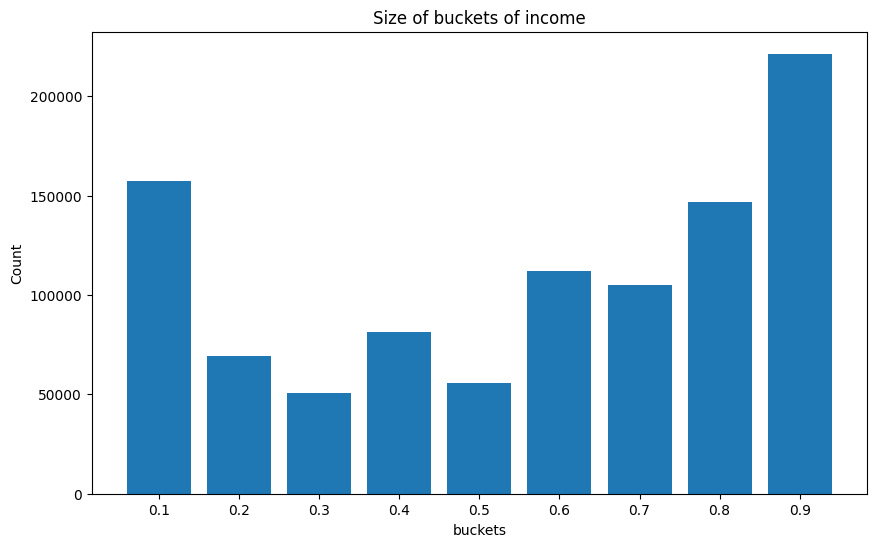

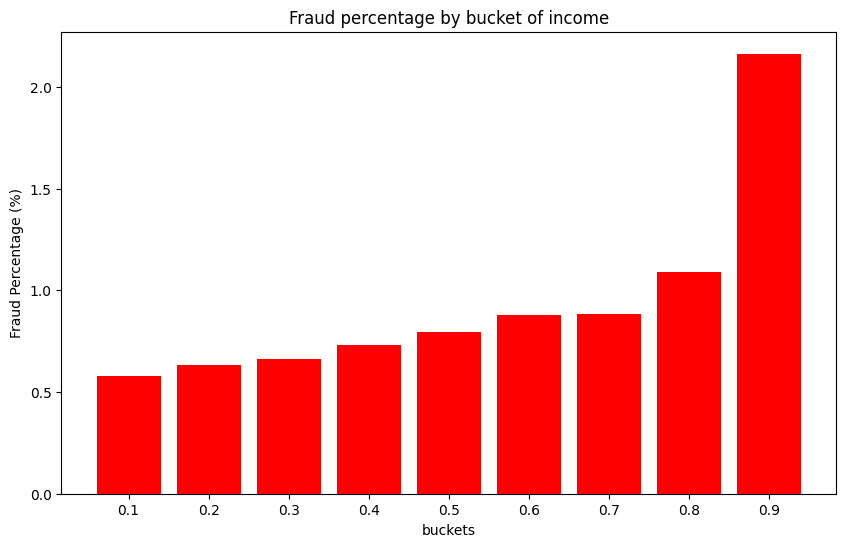

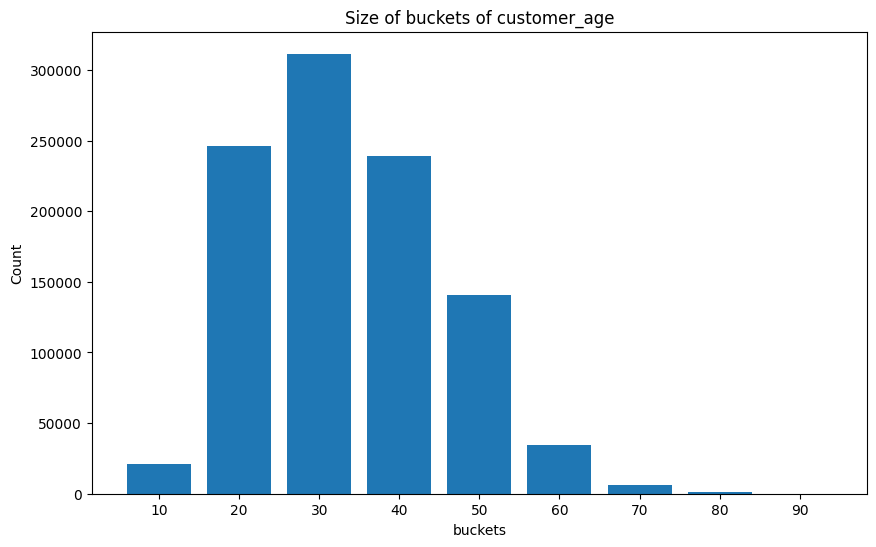

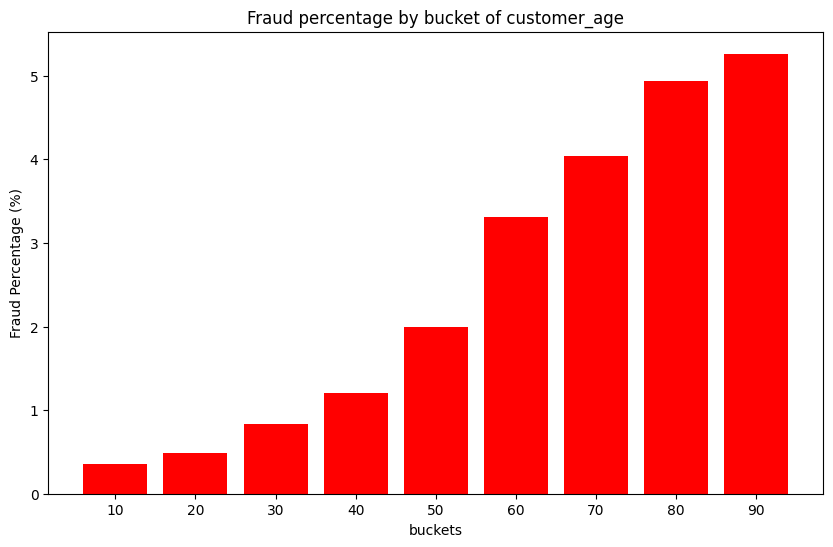

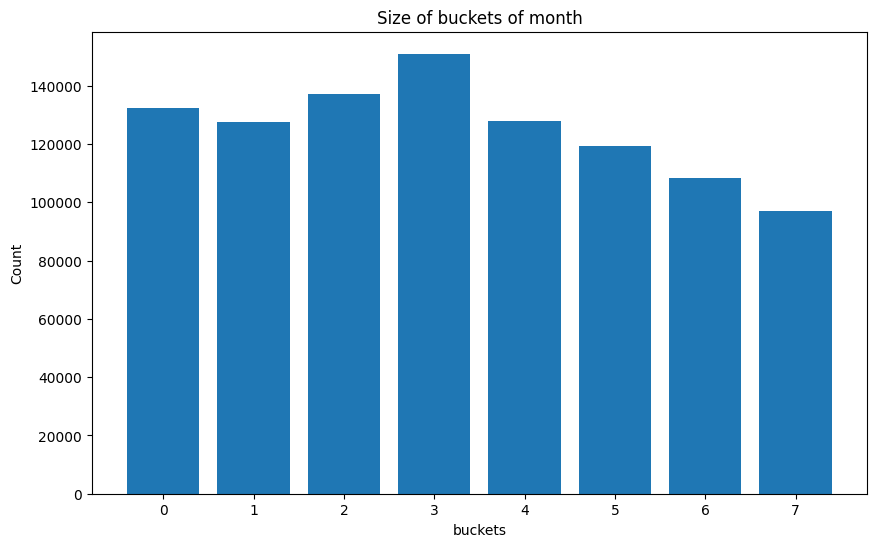

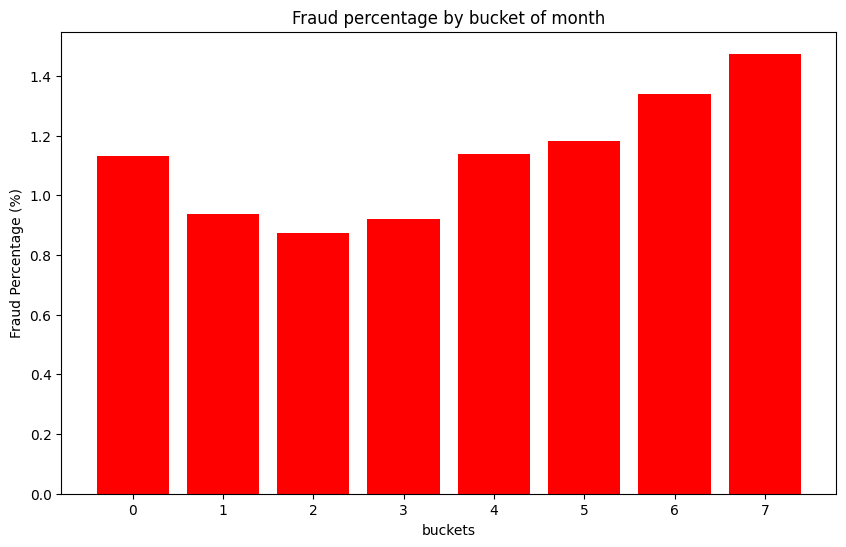

In [402]:
fv.ordinal(data_types['ordinal']+data_types['temporal'])

In [403]:
odds.binary_features(data_types['nominal_binary'])

Odds Ratio
has_other_cards                   0.318417
keep_alive_session                0.376444
phone_home_valid                  0.469967
source_is_internet_not_teleapp    0.688442
phone_mobile_valid                0.702744
email_is_free                     1.740679
foreign_request                   2.069746

In [404]:
odds.multi_category_features(data_types['nominal_multi_category'])

Category  Odds Ratio
Variable                                    
device_os                  linux    0.366027
device_os                  other    0.414704
device_os                    x11    1.016389
device_os              macintosh    1.290321
device_os                windows    4.098390
employment_status             CF    0.167007
employment_status             CE    0.206102
employment_status             CD    0.333332
employment_status             CB    0.586513
employment_status             CG    1.407636
employment_status             CA    1.549991
employment_status             CC    2.386559
housing_status                BE    0.271163
housing_status                BG    0.357193
housing_status                BF    0.377276
housing_status                BC    0.438163
housing_status                BB    0.466137
housing_status                BD    0.776820
housing_status                BA    6.878803
payment_type                  AE    0.311292
payment_type                  AA    0.402194
payment_type                  AD    0.978474
payment_type                  AB    1.032689
payment_type                  AC    1.845299
proposed_credit_limit      210.0    0.147893
proposed_credit_limit      510.0    0.412056
proposed_credit_limit      200.0    0.417136
proposed_credit_limit      190.0    0.553478
proposed_credit_limit      500.0    0.969119
proposed_credit_limit     1000.0    1.001126
proposed_credit_limit      490.0    1.254403
proposed_credit_limit      990.0    1.646218
proposed_credit_limit     1500.0    2.408798
proposed_credit_limit     2100.0   12.459369
proposed_credit_limit     2000.0   14.321557
proposed_credit_limit     1900.0   23.302432

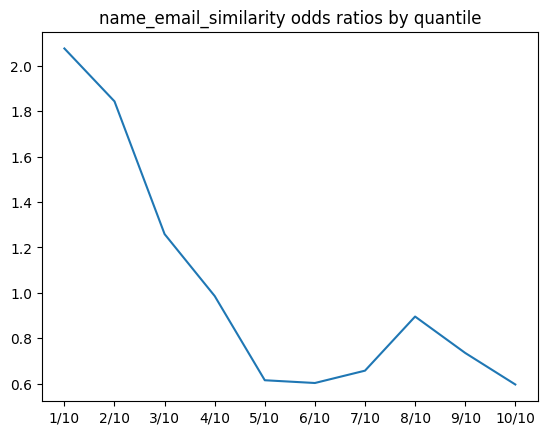

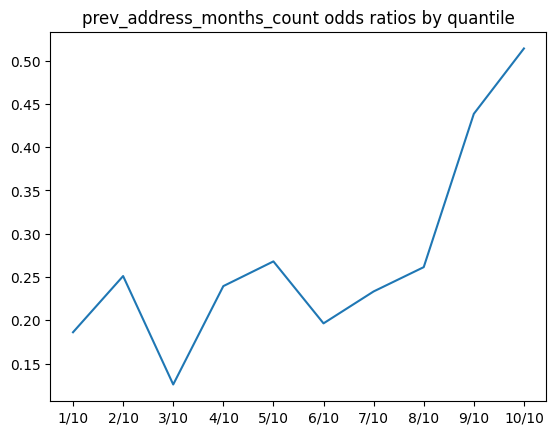

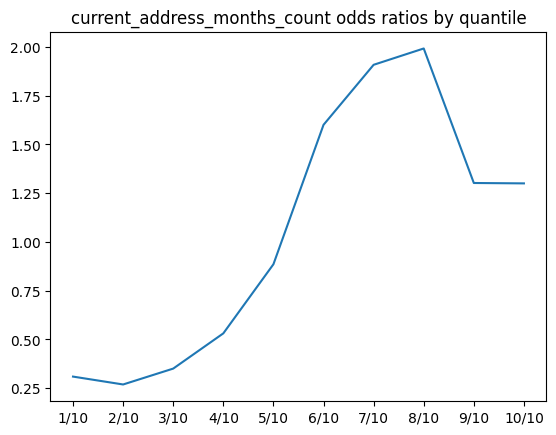

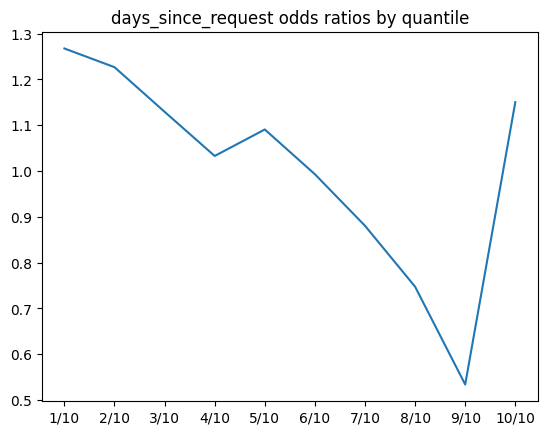

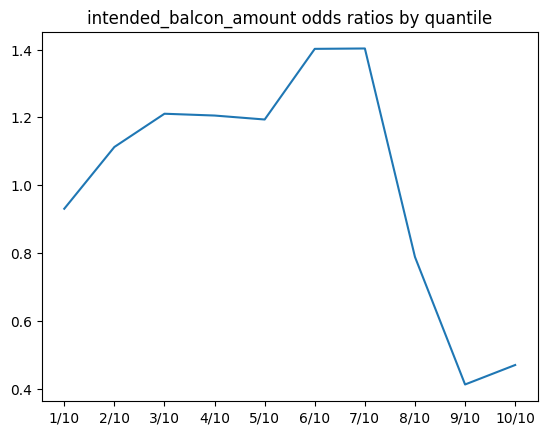

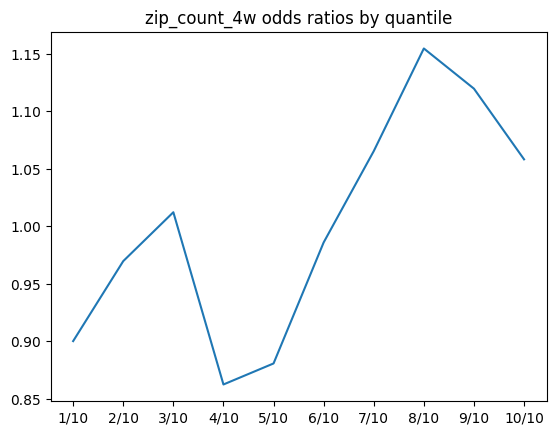

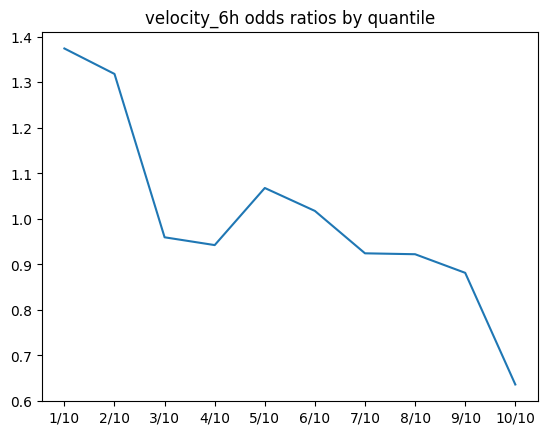

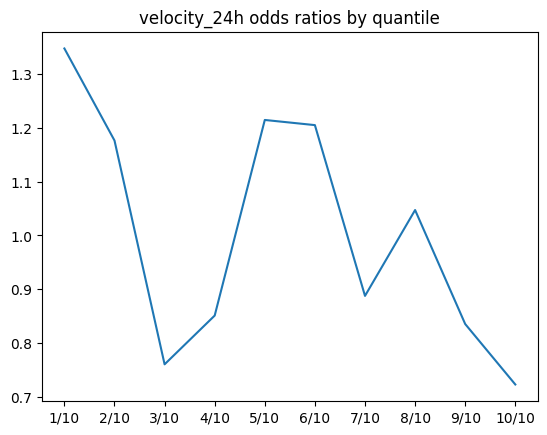

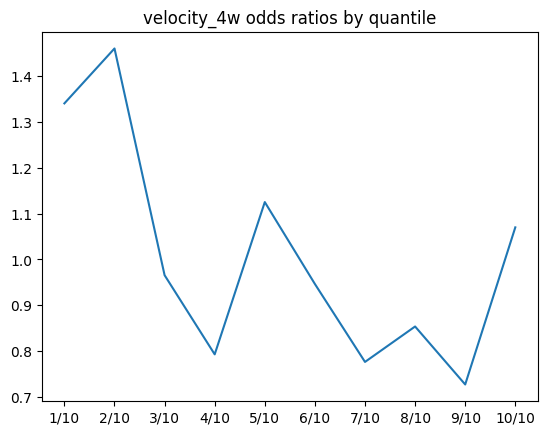

/Users/jonathanwong/Desktop/projects/bank_fraud/EDA.py:307: RuntimeWarning: invalid value encountered in scalar divide
  odds_ratio = (quantile_and_target / quantile_and_not_target) / (not_quantile_and_target / not_quantile_and_not_target)


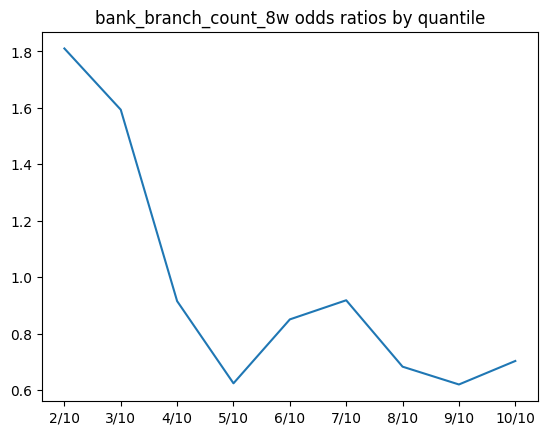

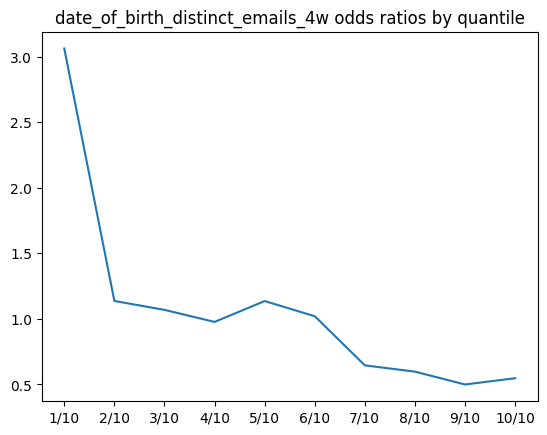

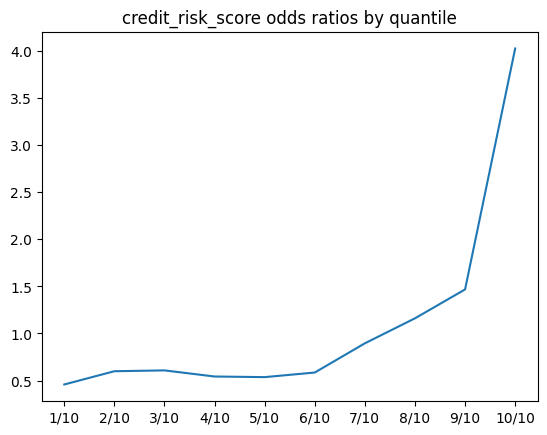

/Users/jonathanwong/Desktop/projects/bank_fraud/EDA.py:307: RuntimeWarning: invalid value encountered in scalar divide
  odds_ratio = (quantile_and_target / quantile_and_not_target) / (not_quantile_and_target / not_quantile_and_not_target)


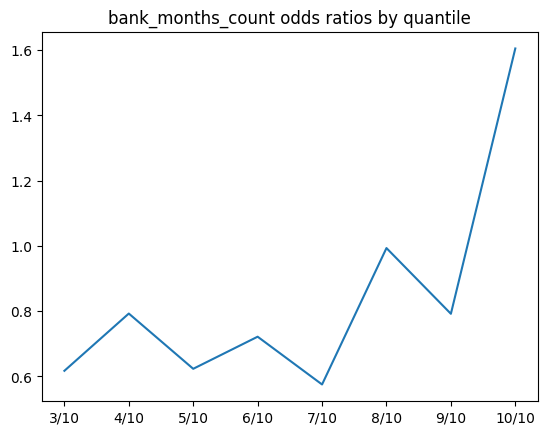

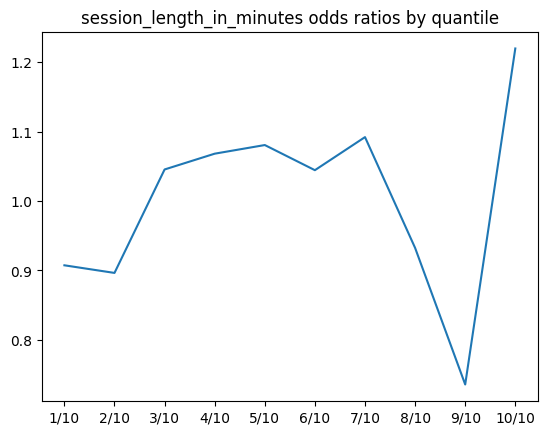

Odds Ratio: name_email_similarity  \
Quantile                                      
1/10                               2.076870   
2/10                               1.843790   
3/10                               1.258789   
4/10                               0.985862   
5/10                               0.614654   
6/10                               0.602521   
7/10                               0.656914   
8/10                               0.895365   
9/10                               0.734985   
10/10                              0.596009   

          Odds Ratio: prev_address_months_count  \
Quantile                                          
1/10                                   0.186216   
2/10                                   0.251132   
3/10                                   0.125898   
4/10                                   0.239511   
5/10                                   0.268066   
6/10                                   0.196485   
7/10                                   0.233352   
8/10                                   0.261426   
9/10                                   0.438515   
10/10                                  0.514004   

          Odds Ratio: current_address_months_count  \
Quantile                                             
1/10                                      0.308995   
2/10                                      0.268559   
3/10                                      0.350045   
4/10                                      0.530738   
5/10                                      0.885151   
6/10                                      1.600268   
7/10                                      1.908197   
8/10                                      1.991899   
9/10                                      1.301968   
10/10                                     1.299942   

          Odds Ratio: days_since_request  Odds Ratio: intended_balcon_amount  \
Quantile                                                                       
1/10                            1.267410                            0.930345   
2/10                            1.226598                            1.112497   
3/10                            1.129227                            1.210584   
4/10                            1.032816                            1.205259   
5/10                            1.090630                            1.193563   
6/10                            0.992976                            1.401952   
7/10                            0.880456                            1.403061   
8/10                            0.747490                            0.788133   
9/10                            0.534098                            0.412015   
10/10                           1.150237                            0.469461   

          Odds Ratio: zip_count_4w  Odds Ratio: velocity_6h  \
Quantile                                                      
1/10                      0.900108                 1.374300   
2/10                      0.969685                 1.318376   
3/10                      1.012211                 0.959534   
4/10                      0.862397                 0.942401   
5/10                      0.880684                 1.067831   
6/10                      0.985928                 1.017453   
7/10                      1.065372                 0.924330   
8/10                      1.154645                 0.922326   
9/10                      1.119696                 0.881449   
10/10                     1.058216                 0.636210   

          Odds Ratio: velocity_24h  Odds Ratio: velocity_4w  \
Quantile                                                      
1/10                      1.347902                 1.340229   
2/10                      1.176602                 1.459979   
3/10                      0.760031                 0.965596   
4/10                      0.850785                 0.792996   
5/10                      1.214849                 1.125039   
6/10                    

In [425]:
odds.numerical_features(data_types['numerical'])

#### Automated Feature Selection
    - After testing significance, use methods like Recursive Feature Elimination (RFE) or SHAP values for machine learning-based importance ranking.

/Users/jonathanwong/Desktop/projects/bank_fraud/EDA.py:344: RuntimeWarning: invalid value encountered in scalar divide
  plt.title(f"{self.target} vs {i}")
/Users/jonathanwong/Desktop/projects/bank_fraud/EDA.py:344: RuntimeWarning: invalid value encountered in scalar divide
  plt.title(f"{self.target} vs {i}")


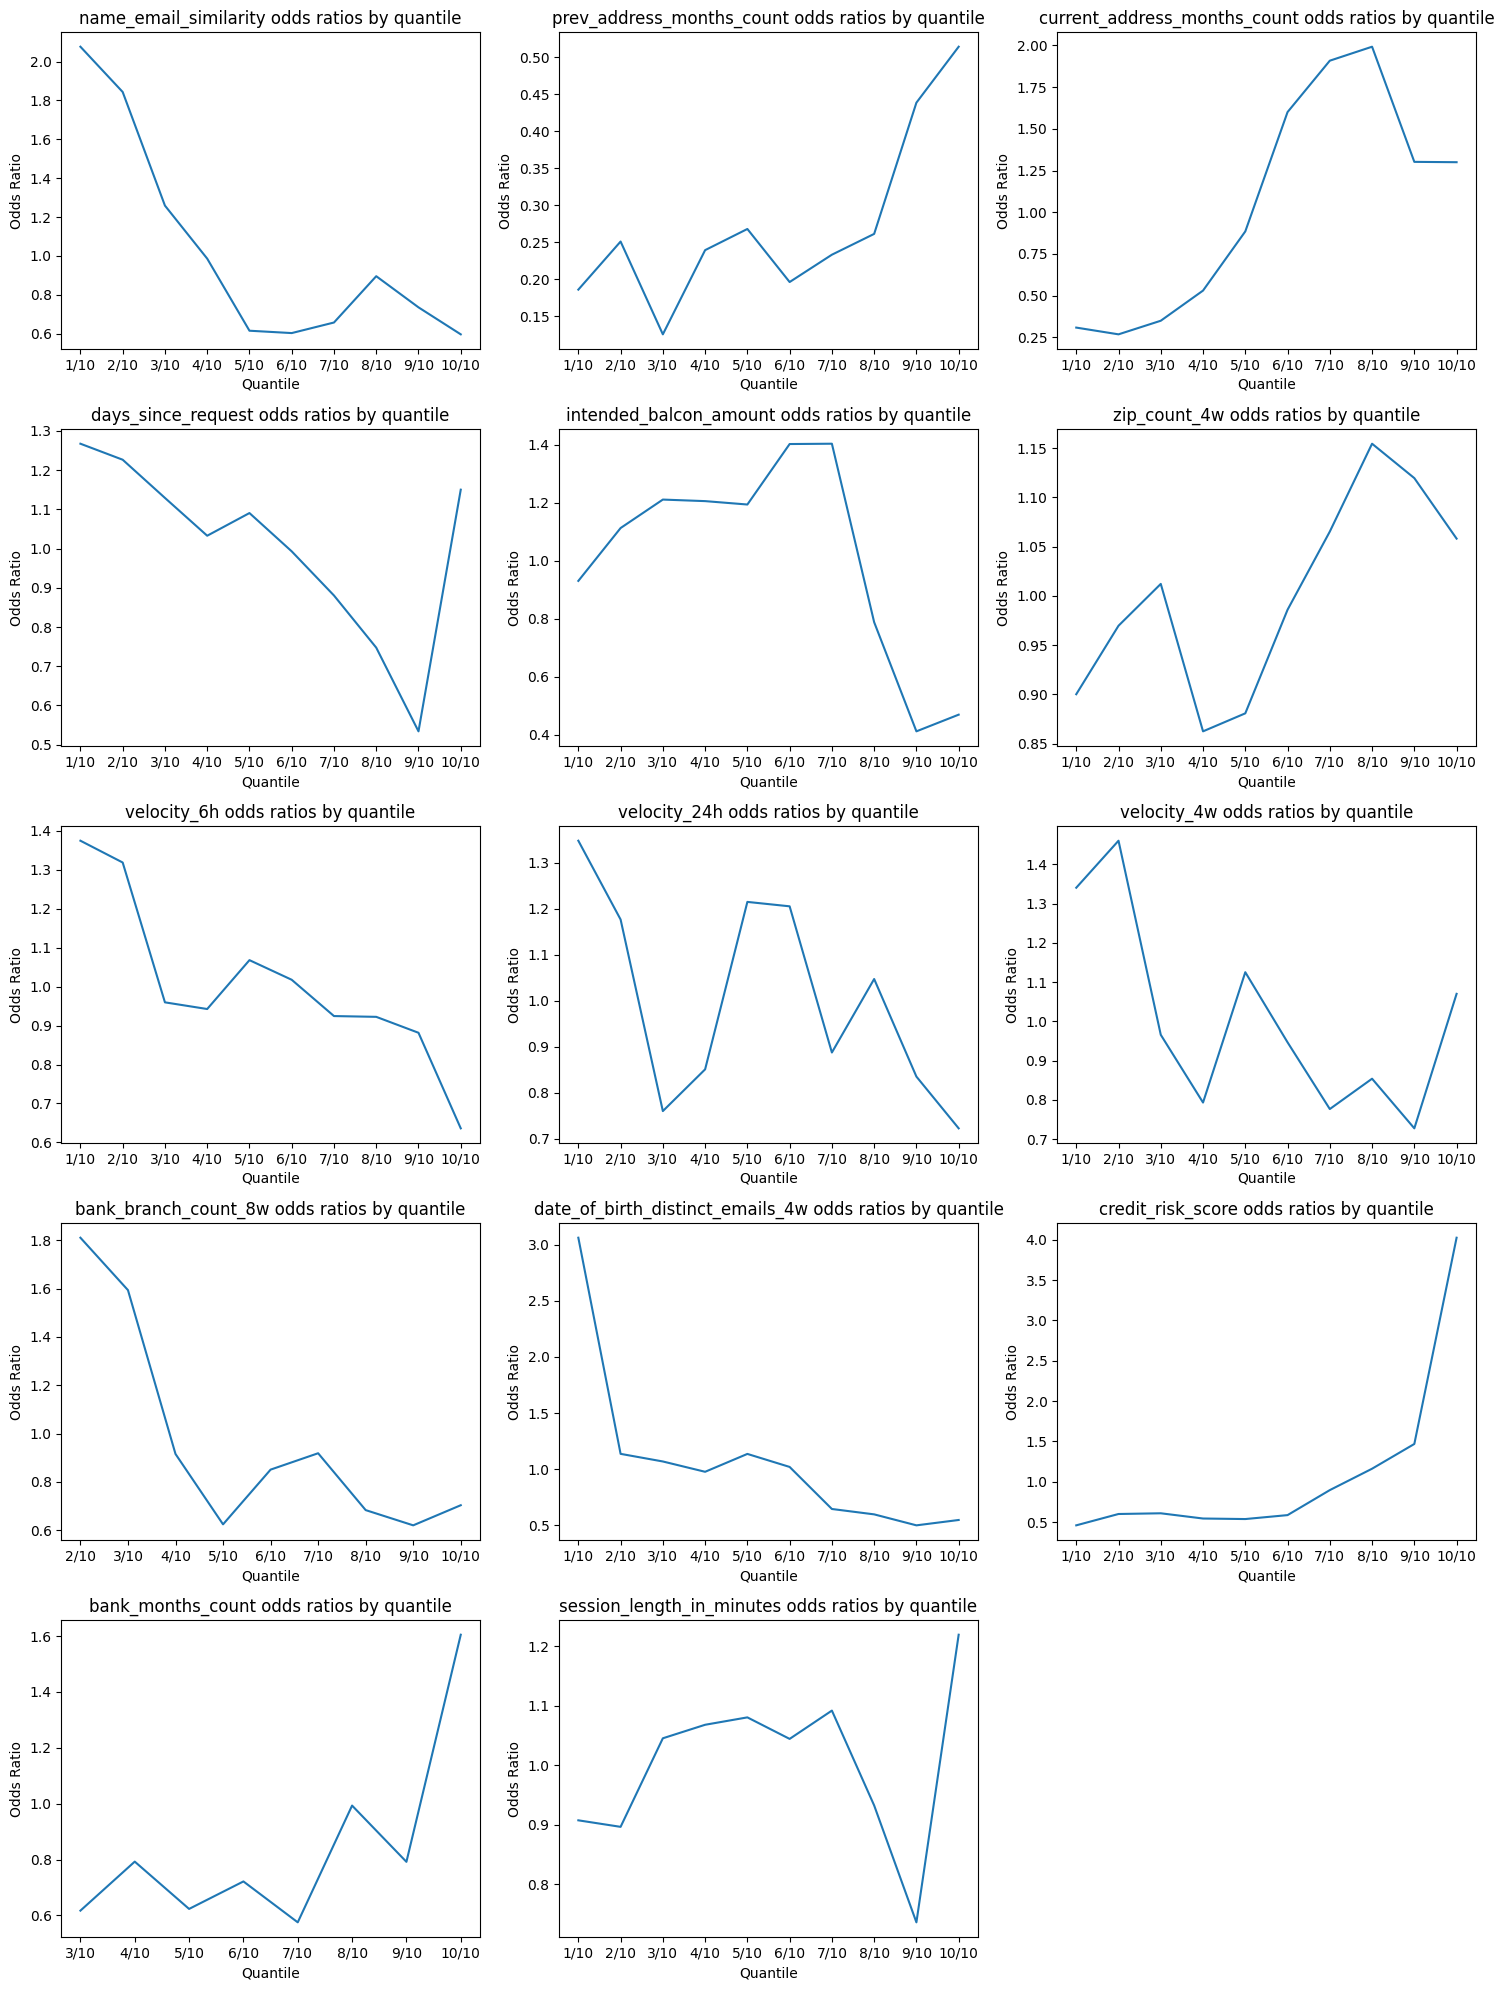

Odds Ratio: name_email_similarity  \
Quantile                                      
1/10                               2.076870   
2/10                               1.843790   
3/10                               1.258789   
4/10                               0.985862   
5/10                               0.614654   
6/10                               0.602521   
7/10                               0.656914   
8/10                               0.895365   
9/10                               0.734985   
10/10                              0.596009   

          Odds Ratio: prev_address_months_count  \
Quantile                                          
1/10                                   0.186216   
2/10                                   0.251132   
3/10                                   0.125898   
4/10                                   0.239511   
5/10                                   0.268066   
6/10                                   0.196485   
7/10                                   0.233352   
8/10                                   0.261426   
9/10                                   0.438515   
10/10                                  0.514004   

          Odds Ratio: current_address_months_count  \
Quantile                                             
1/10                                      0.308995   
2/10                                      0.268559   
3/10                                      0.350045   
4/10                                      0.530738   
5/10                                      0.885151   
6/10                                      1.600268   
7/10                                      1.908197   
8/10                                      1.991899   
9/10                                      1.301968   
10/10                                     1.299942   

          Odds Ratio: days_since_request  Odds Ratio: intended_balcon_amount  \
Quantile                                                                       
1/10                            1.267410                            0.930345   
2/10                            1.226598                            1.112497   
3/10                            1.129227                            1.210584   
4/10                            1.032816                            1.205259   
5/10                            1.090630                            1.193563   
6/10                            0.992976                            1.401952   
7/10                            0.880456                            1.403061   
8/10                            0.747490                            0.788133   
9/10                            0.534098                            0.412015   
10/10                           1.150237                            0.469461   

          Odds Ratio: zip_count_4w  Odds Ratio: velocity_6h  \
Quantile                                                      
1/10                      0.900108                 1.374300   
2/10                      0.969685                 1.318376   
3/10                      1.012211                 0.959534   
4/10                      0.862397                 0.942401   
5/10                      0.880684                 1.067831   
6/10                      0.985928                 1.017453   
7/10                      1.065372                 0.924330   
8/10                      1.154645                 0.922326   
9/10                      1.119696                 0.881449   
10/10                     1.058216                 0.636210   

          Odds Ratio: velocity_24h  Odds Ratio: velocity_4w  \
Quantile                                                      
1/10                      1.347902                 1.340229   
2/10                      1.176602                 1.459979   
3/10                      0.760031                 0.965596   
4/10                      0.850785                 0.792996   
5/10                      1.214849                 1.125039   
6/10                    

In [428]:
odds.numerical_features_grid(data_types['numerical'])